<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Ad_Ease_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 6)

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape)

from statsmodels.tsa.statespace.sarimax import SARIMAX

## Dataset Loading and Data Exploration

In [2]:
!pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [3]:
!gdown 1qQkymAitU6l2pSe702rDUhQpoP8MUZXl

Downloading...
From (original): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl
From (redirected): https://drive.usercontent.google.com/download?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl&confirm=t&uuid=bf715081-2d51-4a51-a080-c14681da23bf
To: /content/train_1.csv
100% 278M/278M [00:09<00:00, 29.4MB/s]


In [4]:
!gdown 19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE

Downloading...
From: https://drive.google.com/uc?id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE
To: /content/Exog_Campaign_eng
100% 1.10k/1.10k [00:00<00:00, 4.33MB/s]


In [5]:
data = pd.read_csv("train_1.csv")

In [6]:
data.shape

(145063, 551)

In [7]:
data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [9]:
data.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

In [10]:
data.Page.nunique()

145063

In [11]:
data.Page

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
                                ...                        
145058    Underworld_(serie_de_películas)_es.wikipedia.o...
145059    Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060    Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061    Hasta_el_último_hombre_es.wikipedia.org_all-ac...
145062    Francisco_el_matemático_(serie_de_televisión_d...
Name: Page, Length: 145063, dtype: object

## Extracting Language, Domain,Access and Origin from "Page"

In [12]:
data["Page1"] = data.Page.str.split("_").apply(lambda x : x[-3:])

In [13]:
data.Page1

0         [zh.wikipedia.org, all-access, spider]
1         [zh.wikipedia.org, all-access, spider]
2         [zh.wikipedia.org, all-access, spider]
3         [zh.wikipedia.org, all-access, spider]
4         [zh.wikipedia.org, all-access, spider]
                           ...                  
145058    [es.wikipedia.org, all-access, spider]
145059    [es.wikipedia.org, all-access, spider]
145060    [es.wikipedia.org, all-access, spider]
145061    [es.wikipedia.org, all-access, spider]
145062    [es.wikipedia.org, all-access, spider]
Name: Page1, Length: 145063, dtype: object

In [14]:
data["Domain1"] = data.Page1.apply(lambda x : x[0])
data["Access"] = data.Page1.apply(lambda x : x[1])
data["Origin"] = data.Page1.apply(lambda x : x[2])

In [15]:
data.Domain1= data.Domain1.str.split(".")

In [16]:
data.Domain1.tail(5)

145058    [es, wikipedia, org]
145059    [es, wikipedia, org]
145060    [es, wikipedia, org]
145061    [es, wikipedia, org]
145062    [es, wikipedia, org]
Name: Domain1, dtype: object

In [17]:
data["Domain"] = data.Domain1.apply(lambda x : x[1])
data["Language"] = data.Domain1.apply(lambda x : x[0])

In [18]:
data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31', 'Page1',
       'Domain1', 'Access', 'Origin', 'Domain', 'Language'],
      dtype='object', length=557)

In [19]:
data[data.columns[-4:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Access    145063 non-null  object
 1   Origin    145063 non-null  object
 2   Domain    145063 non-null  object
 3   Language  145063 non-null  object
dtypes: object(4)
memory usage: 4.4+ MB


In [20]:
for i in data.columns[-4:]:
  print("unique Values of",i, "are",data[i].nunique())
  print(data[i].value_counts())
  print("******************************************************************")

unique Values of Access are 3
all-access    74315
mobile-web    35939
desktop       34809
Name: Access, dtype: int64
******************************************************************
unique Values of Origin are 2
all-agents    110150
spider         34913
Name: Origin, dtype: int64
******************************************************************
unique Values of Domain are 3
wikipedia    127208
wikimedia     10555
mediawiki      7300
Name: Domain, dtype: int64
******************************************************************
unique Values of Language are 9
en         24108
ja         20431
de         18547
fr         17802
zh         17229
ru         15022
es         14069
commons    10555
www         7300
Name: Language, dtype: int64
******************************************************************


* All the Required features have been extracted for "Page" Column

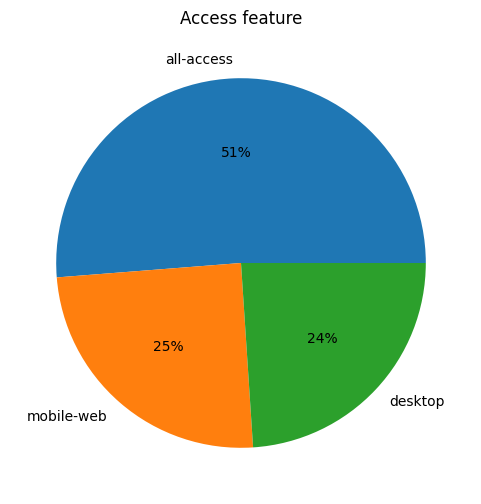

In [42]:
plt.pie(x = data["Access"].value_counts().reset_index()["Access"],
        labels = data["Access"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Access feature")
plt.show()

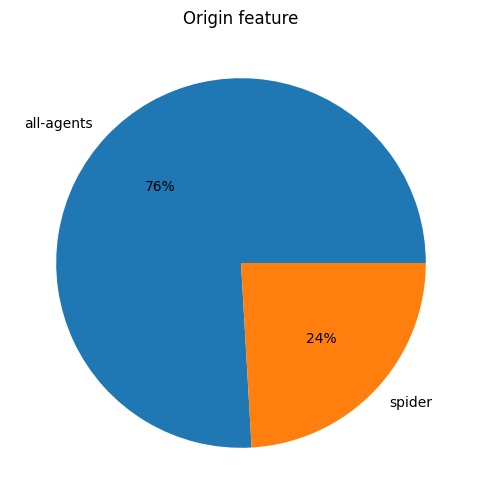

In [43]:
plt.pie(x = data["Origin"].value_counts().reset_index()["Origin"],
        labels = data["Origin"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Origin feature")
plt.show()

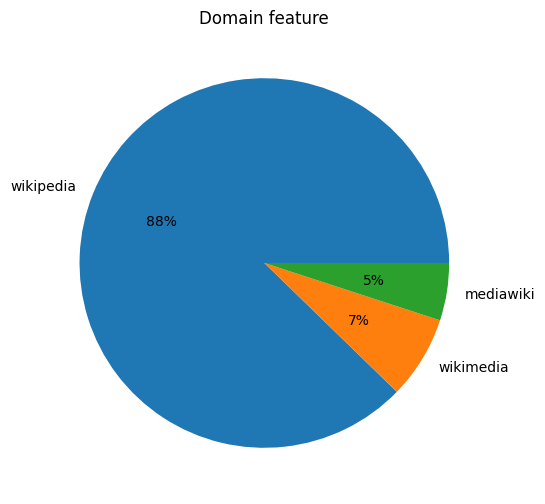

In [44]:
plt.pie(x = data["Domain"].value_counts().reset_index()["Domain"],
        labels = data["Domain"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Domain feature")
plt.show()

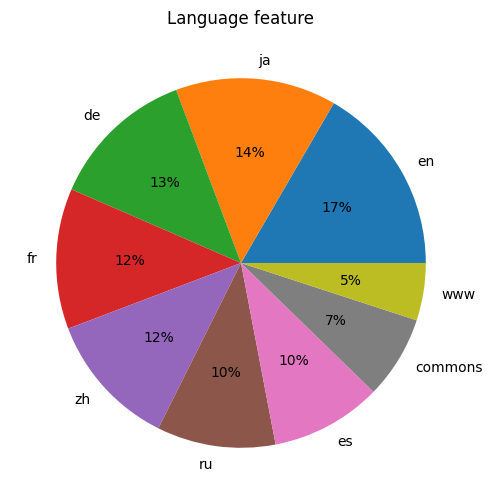

In [45]:
plt.pie(x = data["Language"].value_counts().reset_index()["Language"],
        labels = data["Language"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Language feature")
plt.show()

In [21]:
data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31', 'Page1',
       'Domain1', 'Access', 'Origin', 'Domain', 'Language'],
      dtype='object', length=557)

## Treating Null Values and Data Cleaning

In [22]:
data.isnull().sum(axis=0)

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
Domain1           0
Access            0
Origin            0
Domain            0
Language          0
Length: 557, dtype: int64

<Axes: >

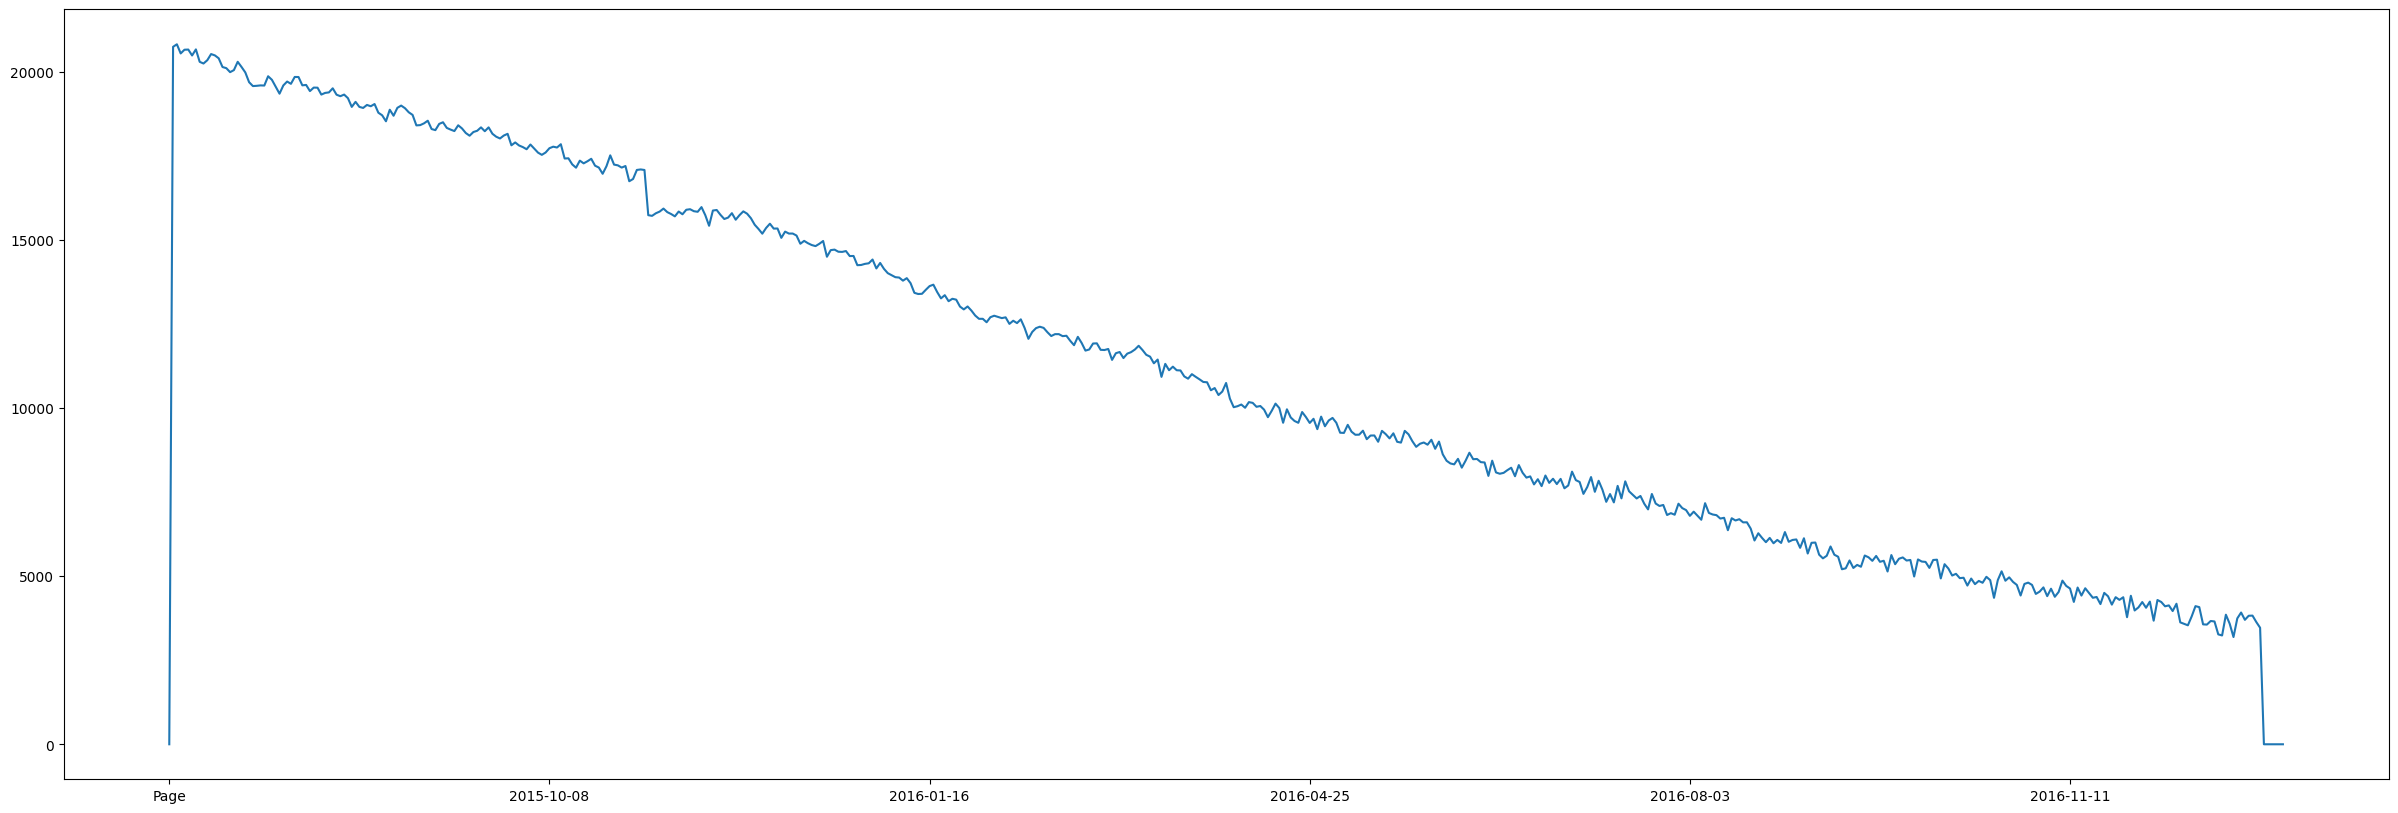

In [23]:
plt.figure(figsize=(30,10))
data.isnull().sum(axis=0).plot()

* Click rate has Increased Across all Page from 1st Day to 550th day

In [24]:
data.isnull().sum(axis=1)

0           0
1           0
2           0
3           0
4         291
         ... 
145058    544
145059    550
145060    550
145061    550
145062    550
Length: 145063, dtype: int64

<Axes: >

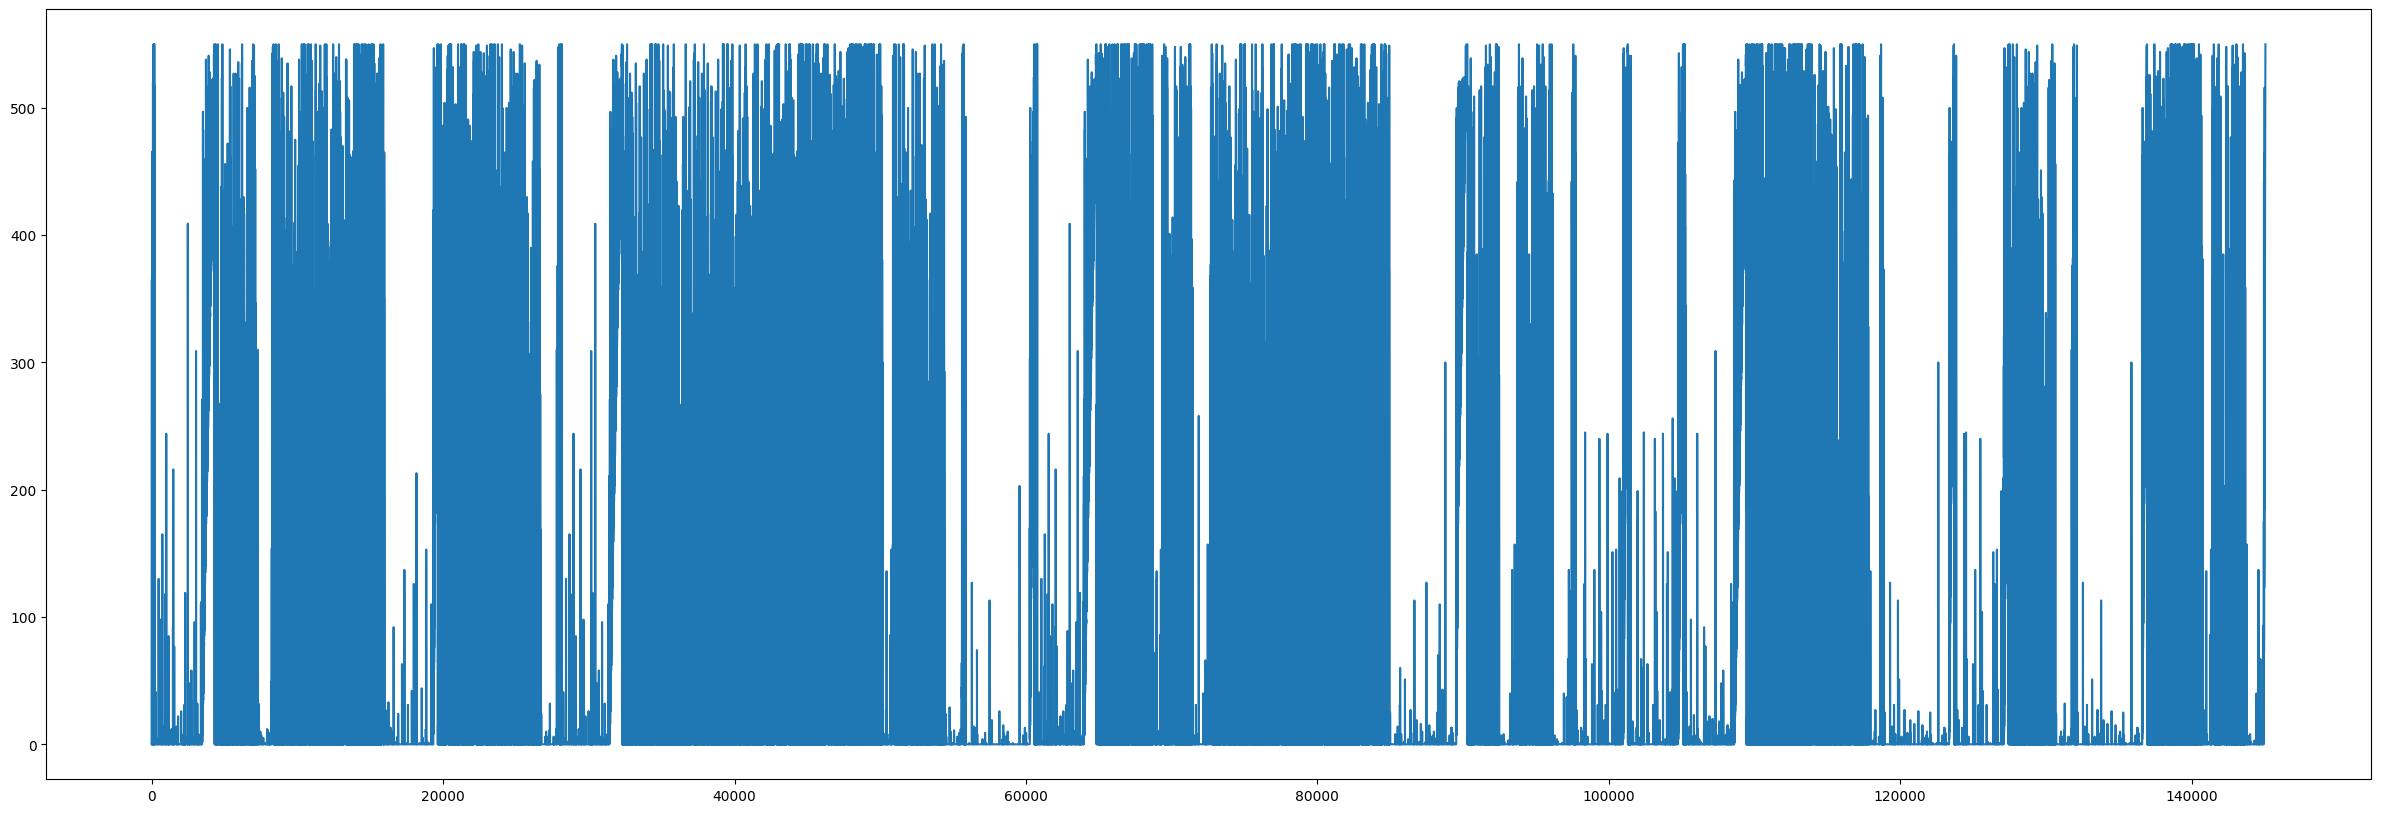

In [25]:
plt.figure(figsize=(30,10))
data.isnull().sum(axis=1).plot()

* There are Rows in which no clicks are avaiable at all
* They give no good information for our analysis
* lets drop those Rows

In [26]:
data = data[~(data.isnull().sum(axis=1) == 550)]

* As we have no of clicks in each date for all pages
* we will assume Nan as "Zero Clicks"
* So we will fill with "0"

In [27]:
data.fillna(0,inplace= True)

In [28]:
data.isnull().sum(axis=0).sum()

0

In [29]:
data.drop(columns=["Page","Page1","Domain1"], axis=1, inplace=True)

In [30]:
data.head()

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   
1        11.0        14.0        15.0        18.0        11.0        13.0   
2         1.0         0.0         1.0         1.0         0.0         4.0   
3        35.0        13.0        10.0        94.0         4.0        26.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-26  \
0         9.0        22.0        26.0        24.0  ...        14.0   
1        22.0        11.0        10.0         4.0  ...         9.0   
2         0.0         3.0         4.0         4.0  ...         4.0   
3        14.0         9.0        11.0        16.0  ...        16.0   
4         0.0         0.0         0.0         0.0  ...         3.0   

   2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31      Access  \
0        20.0        22.0        19.0        18.0        20.0  all-access   
1        30.0        52.0        45.0        26.0        20.0  all-access   
2         4.0         6.0         3.0         4.0        17.0  all-access   
3        11.0        17.0        19.0        10.0        11.0  all-access   
4        11.0        27.0        13.0        36.0        10.0  all-access   

   Origin     Domain  Language  
0  spider  wikipedia        zh  
1  spider  wikipedia        zh  
2  spider  wikipedia        zh  
3  spider  wikipedia        zh  
4  spider  wikipedia        zh  

[5 rows x 554 columns]

In [31]:
data[data.columns[-4:]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144411 entries, 0 to 145058
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Access    144411 non-null  object
 1   Origin    144411 non-null  object
 2   Domain    144411 non-null  object
 3   Language  144411 non-null  object
dtypes: object(4)
memory usage: 5.5+ MB


In [32]:
for i in data.columns[-4:]:
  print("unique Values of",i, "are",data[i].nunique())
  print(data[i].value_counts())
  print("******************************************************************")

unique Values of Access are 3
all-access    74002
mobile-web    35813
desktop       34596
Name: Access, dtype: int64
******************************************************************
unique Values of Origin are 2
all-agents    109630
spider         34781
Name: Origin, dtype: int64
******************************************************************
unique Values of Domain are 3
wikipedia    126683
wikimedia     10477
mediawiki      7251
Name: Domain, dtype: int64
******************************************************************
unique Values of Language are 9
en         24010
ja         20340
de         18438
fr         17761
zh         17103
ru         14990
es         14041
commons    10477
www         7251
Name: Language, dtype: int64
******************************************************************


In [33]:
data.columns[:-4]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

## DataFrame Formating for Time Series

**Further Lets perform the Analysis for One parameter : Language**

**Lets do group by "Language" and take the mean of the data as Aggregation**

In [34]:
Language_data=data.groupby("Language")[data.columns[:-4]].mean()

In [35]:
Language_data

2015-07-01   2015-07-02   2015-07-03   2015-07-04   2015-07-05  \
Language                                                                    
commons    108.888136   112.449174   109.816455    90.800515   100.986542   
de         719.195086   709.398850   680.878729   624.817171   726.344886   
en        3528.204498  3516.807372  3338.930779  3476.185090  3590.113994   
es        1088.138523  1039.884125   956.315932   897.837618   976.451535   
fr         476.247846   479.305895   460.899161   492.643545   483.671696   
ja         583.244838   669.655457   604.984415   759.893756   728.967748   
ru         631.344496   642.271047   595.294396   559.920881   596.299400   
www         48.229624    52.914081    44.919873    42.581161    46.681147   
zh         242.354441   242.717009   241.107350   243.433784   259.678770   

           2015-07-06   2015-07-07   2015-07-08   2015-07-09   2015-07-10  \
Language                                                                    
commons    115.496707   120.438293   133.343419   115.665649   110.755751   
de         799.531294   775.371081   786.701052   757.391149   705.850852   
en        3865.449229  3658.394586  3451.903207  3531.816368  3511.847397   
es        1112.851934  1084.727156  1052.764760  1032.896945   938.998718   
fr         503.901751   487.067170   478.099938   473.151624   446.523450   
ja         635.228466   617.936480   614.197984   598.734415   622.070010   
ru         642.354636   627.630420   624.690927   639.913876   732.813342   
www         54.047028    59.758930    51.349193    45.739208    55.070473   
zh         261.023797   260.739110   267.546161   265.909080   276.436239   

          ...   2016-12-22   2016-12-23   2016-12-24   2016-12-25  \
Language  ...                                                       
commons   ...   191.299131   228.930705   190.439343   230.437721   
de        ...   833.637271   843.986007   815.549138  1288.661948   
en        ...  5018.391212  4702.429863  4992.124948  5161.444856   
es        ...   985.529521   936.947226   882.063386   905.445695   
fr        ...   653.509825   640.935589   619.643038   668.177974   
ja        ...   678.125172   972.338545   860.437414   822.036087   
ru        ...   898.265510   886.730220   876.140961  1123.383389   
www       ...    47.453317    75.243001    70.467798    71.997104   
zh        ...   347.708004   342.928258   363.396188   384.132141   

           2016-12-26   2016-12-27   2016-12-28   2016-12-29   2016-12-30  \
Language                                                                    
commons    253.815692   220.040374   248.068627   220.415482   239.206166   
de        1213.610370  1091.510142  1038.745471  1000.537260   954.877427   
en        5793.924198  6065.336568  5884.146855  6270.617826  5223.014786   
es        1197.865608  1135.628018  1180.640624  1114.388932   823.309949   
fr         939.047520   860.394685   775.942852   754.450538   702.160577   
ja         782.600442   792.689331   794.037119   869.355359   956.277630   
ru        1115.216478  1003.346765   933.977252   899.197932   804.986658   
www         41.582816    44.134188   100.653151    44.227693    59.537857   
zh         379.220780   378.789803   380.833772   353.303222   357.317605   

           2016-12-31  
Language               
commons    207.819319  
de         898.292656  
en        5148.846689  
es         788.969732  
fr         647.750183  
ja        1202.595821  
ru         882.123616  
www         54.189767  
zh         368.272525  

[9 rows x 550 columns]

In [36]:
Language_data = Language_data.transpose()

In [37]:
Language_data

Language       commons           de           en           es          fr  \
2015-07-01  108.888136   719.195086  3528.204498  1088.138523  476.247846   
2015-07-02  112.449174   709.398850  3516.807372  1039.884125  479.305895   
2015-07-03  109.816455   680.878729  3338.930779   956.315932  460.899161   
2015-07-04   90.800515   624.817171  3476.185090   897.837618  492.643545   
2015-07-05  100.986542   726.344886  3590.113994   976.451535  483.671696   
...                ...          ...          ...          ...         ...   
2016-12-27  220.040374  1091.510142  6065.336568  1135.628018  860.394685   
2016-12-28  248.068627  1038.745471  5884.146855  1180.640624  775.942852   
2016-12-29  220.415482  1000.537260  6270.617826  1114.388932  754.450538   
2016-12-30  239.206166   954.877427  5223.014786   823.309949  702.160577   
2016-12-31  207.819319   898.292656  5148.846689   788.969732  647.750183   

Language             ja           ru         www          zh  
2015-07-01   583.244838   631.344496   48.229624  242.354441  
2015-07-02   669.655457   642.271047   52.914081  242.717009  
2015-07-03   604.984415   595.294396   44.919873  241.107350  
2015-07-04   759.893756   559.920881   42.581161  243.433784  
2015-07-05   728.967748   596.299400   46.681147  259.678770  
...                 ...          ...         ...         ...  
2016-12-27   792.689331  1003.346765   44.134188  378.789803  
2016-12-28   794.037119   933.977252  100.653151  380.833772  
2016-12-29   869.355359   899.197932   44.227693  353.303222  
2016-12-30   956.277630   804.986658   59.537857  357.317605  
2016-12-31  1202.595821   882.123616   54.189767  368.272525  

[550 rows x 9 columns]

In [38]:
Language_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   commons  550 non-null    float64
 1   de       550 non-null    float64
 2   en       550 non-null    float64
 3   es       550 non-null    float64
 4   fr       550 non-null    float64
 5   ja       550 non-null    float64
 6   ru       550 non-null    float64
 7   www      550 non-null    float64
 8   zh       550 non-null    float64
dtypes: float64(9)
memory usage: 59.1+ KB


In [39]:
Language_data.columns

Index(['commons', 'de', 'en', 'es', 'fr', 'ja', 'ru', 'www', 'zh'], dtype='object', name='Language')

* lets change dtype of index to "datetime64"

In [40]:
Language_data.index = pd.date_range('2015-07-01', '2016-12-31', freq='D')

In [41]:
Language_data.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=550, freq='D')

## Exploratory Data Analysis [Language]

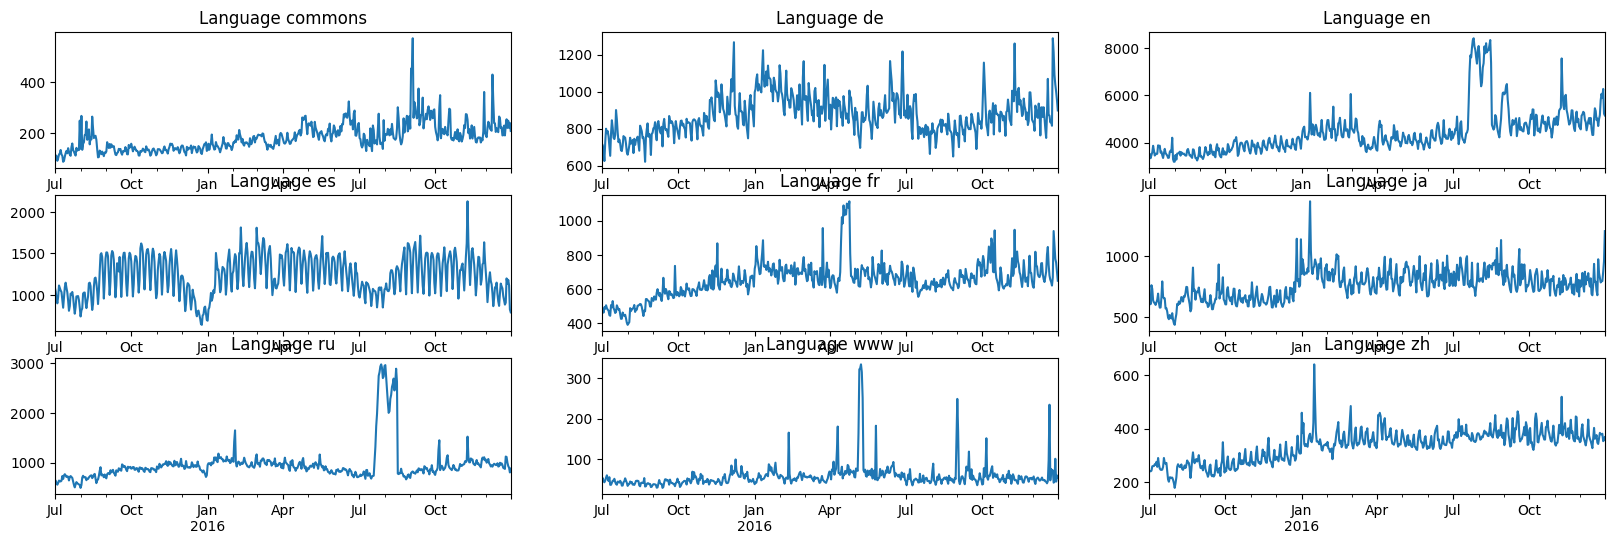

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  Language_data[Language_data.columns[i]].plot()
  plt.title(f"Language {Language_data.columns[i]}")


In [46]:
Language_data.describe()

Language     commons           de           en           es           fr  \
count     550.000000   550.000000   550.000000   550.000000   550.000000   
mean      182.126224   873.888289  4448.809990  1228.894665   652.893573   
std        55.525109   108.085303   972.707082   234.605924   104.563020   
min        86.938150   620.775735  3188.726697   638.137027   389.371375   
25%       140.605183   800.539253  3819.931175  1050.762891   603.147613   
50%       173.129426   861.191859  4224.865223  1217.930632   648.895980   
75%       207.979527   941.082927  4753.749094  1438.439712   701.787132   
max       572.033693  1288.661948  8415.783840  2127.479168  1113.286527   

Language           ja           ru         www          zh  
count      550.000000   550.000000  550.000000  550.000000  
mean       766.183084   970.145651   57.498001  337.206692  
std        121.730204   382.900843   32.298129   58.825101  
min        435.694838   495.469179   28.640325  179.565456  
25%        678.435398   815.932338   44.152496  286.337017  
50%        763.963963   906.309473   51.137291  346.600099  
75%        844.206895   987.694780   60.566025  375.255277  
max       1446.509538  2971.126151  334.153082  638.638017

<Axes: xlabel='Language'>

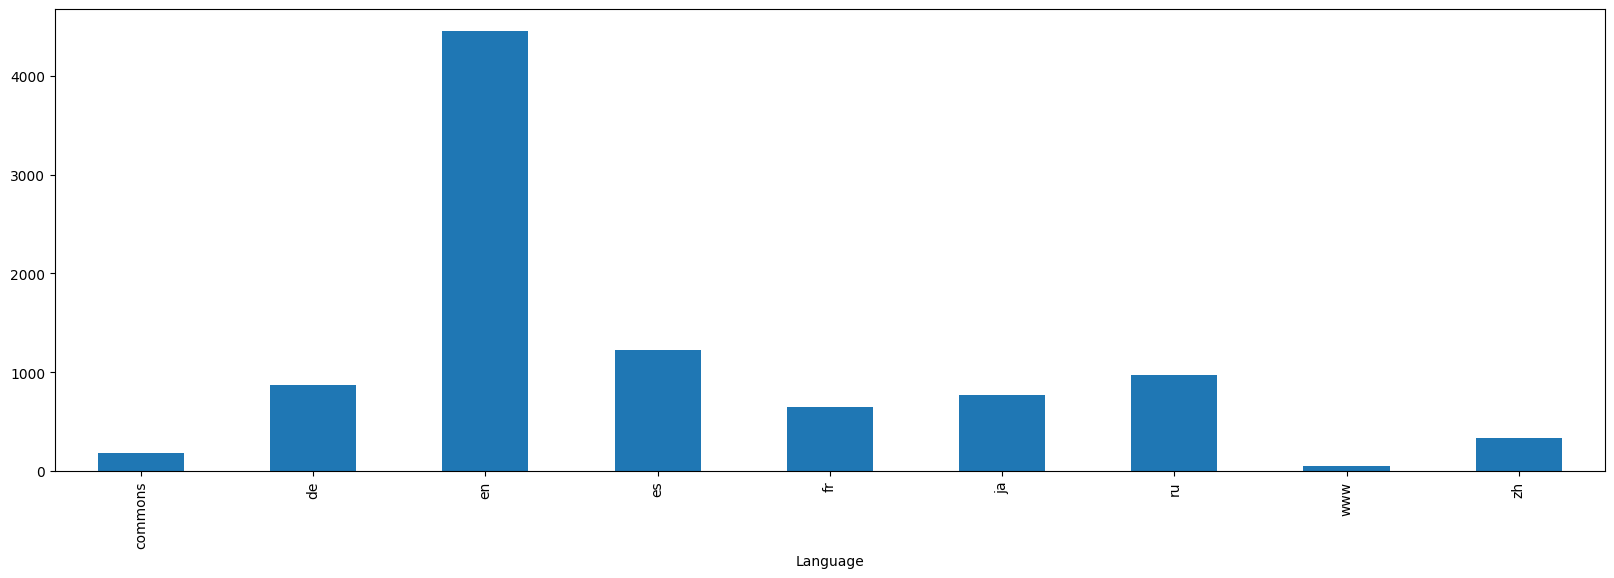

In [54]:
Language_data.mean(axis=0).plot( kind="bar")

* From Median and Mean Comparison, we can understand there are not much of Outliers
* No of Page Visits are high for Language "en" and least for "www"

* However There are unusal spikes in the No of page visits
* This might be due to some unknown Exog values

## Stationality Test

In [ ]:
import statsmodels.api as sm
def adf_test(data, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1]

    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

In [ ]:
for i in range(9):
  print(Language_data.columns[i], end =" ")
  adf_test(Language_data[Language_data.columns[i]])

commons Sequence is not stationary
de Sequence is not stationary
en Sequence is not stationary
es Sequence is stationary
fr Sequence is not stationary
ja Sequence is not stationary
ru Sequence is stationary
www Sequence is stationary
zh Sequence is not stationary


## Decomposition

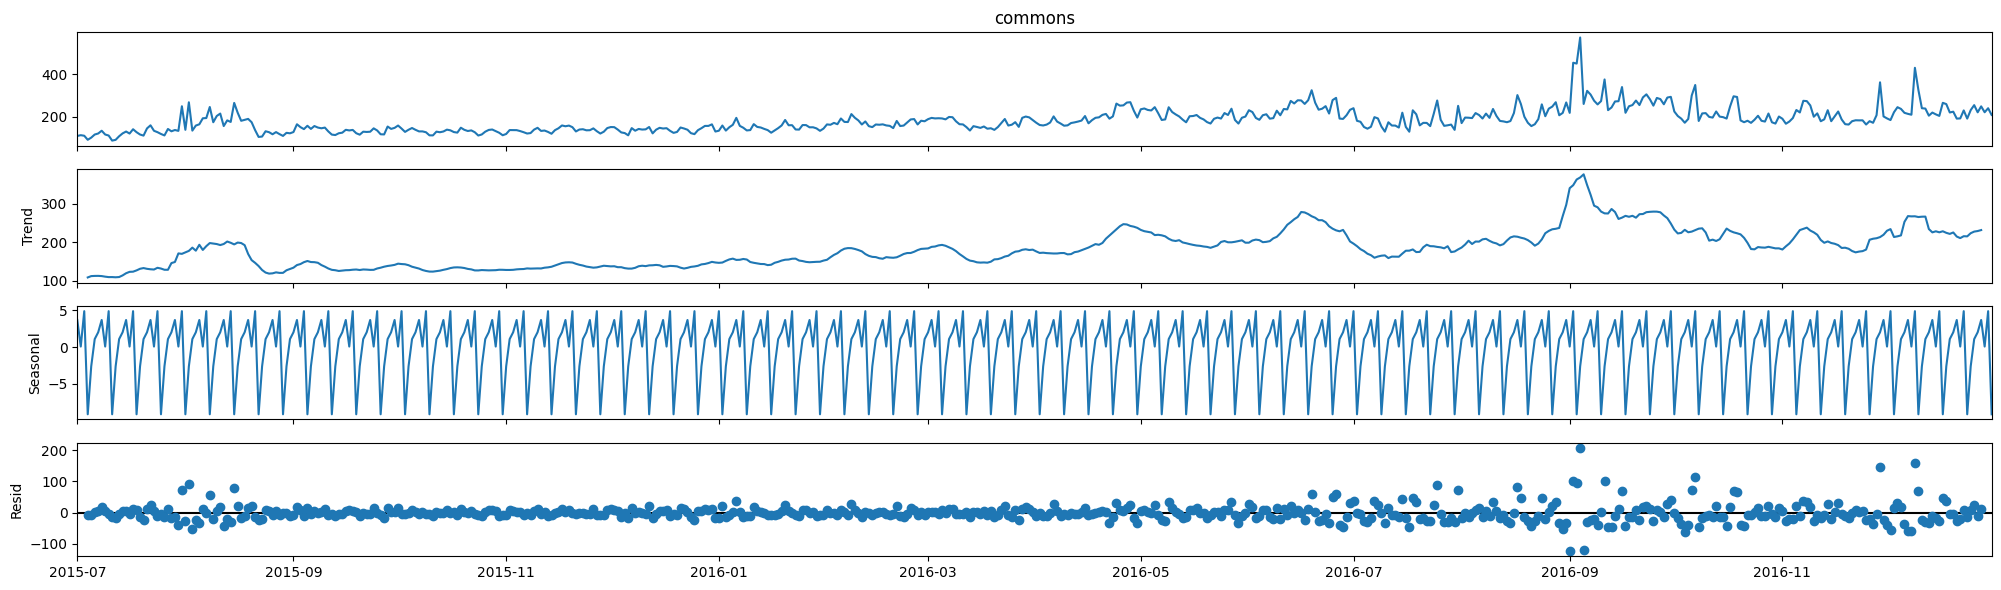

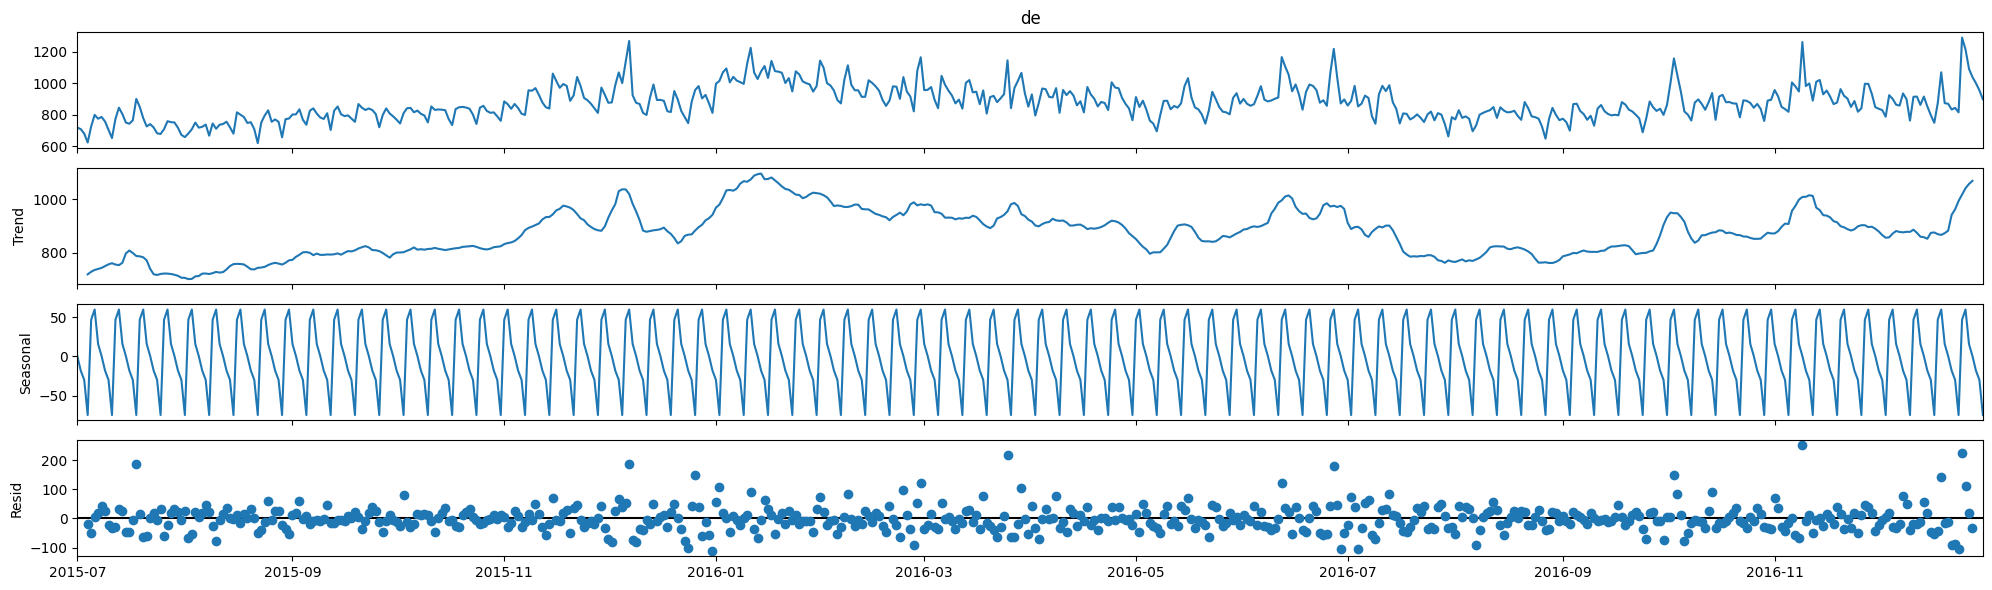

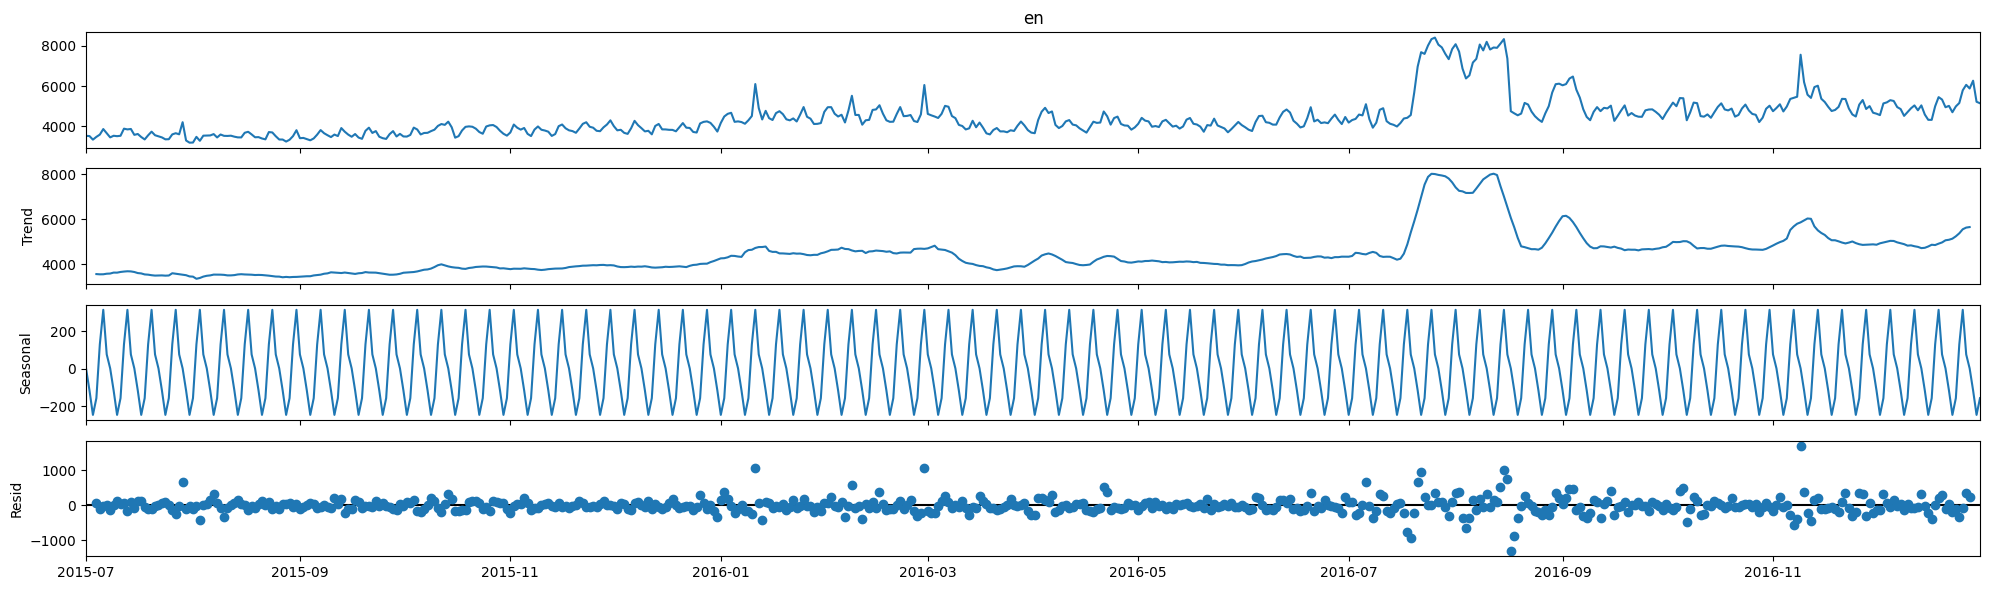

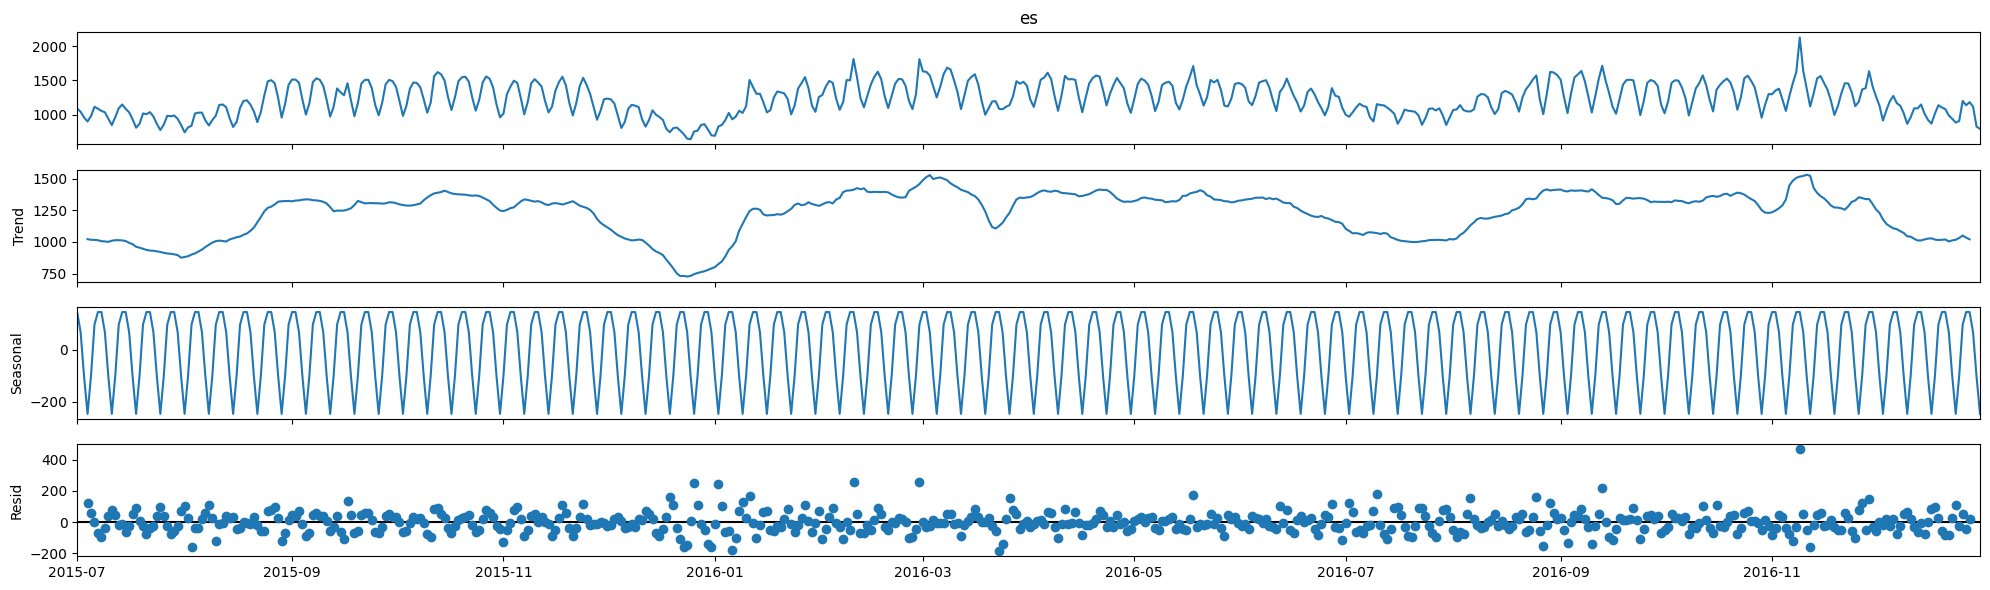

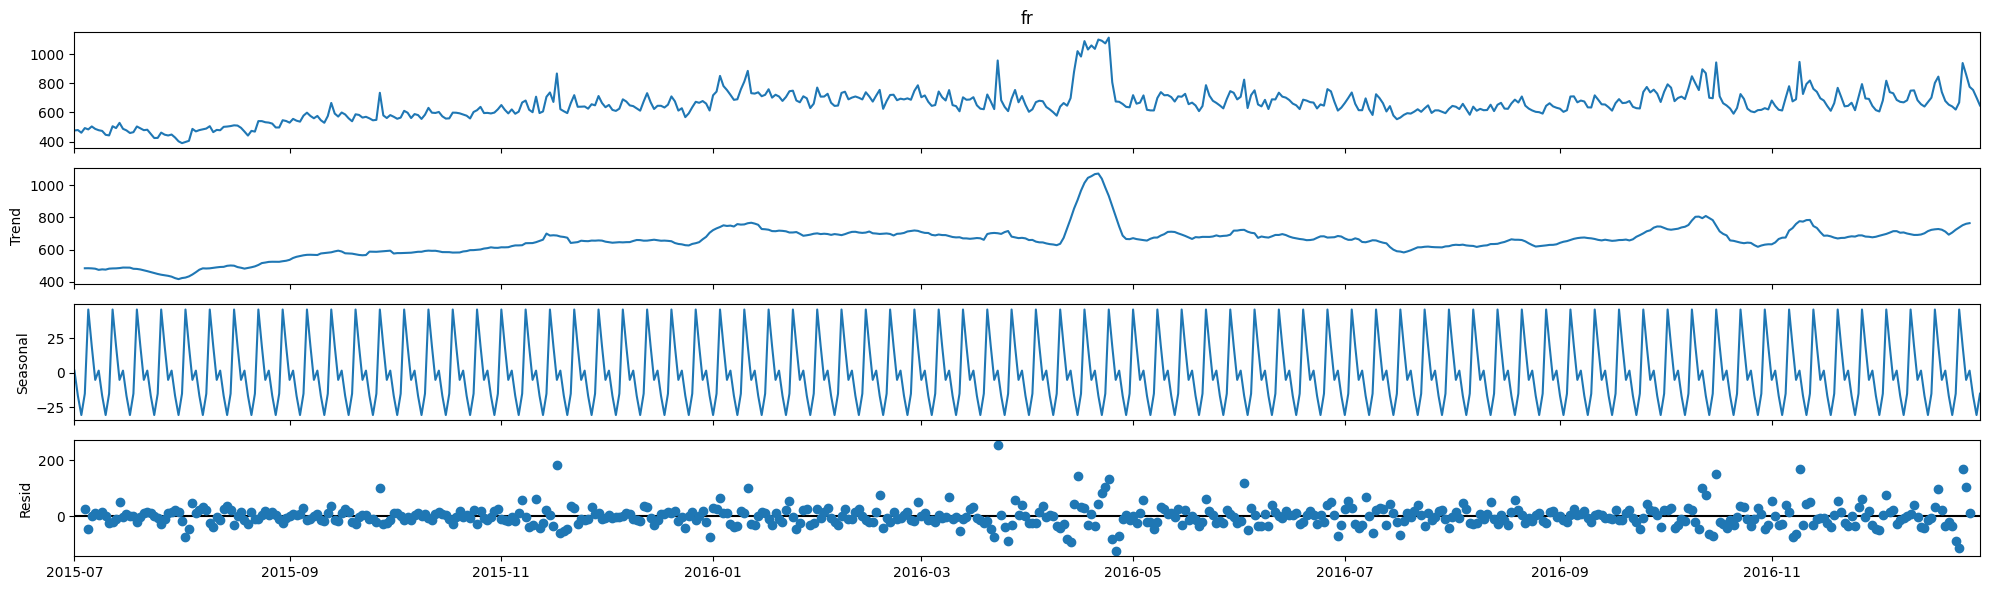

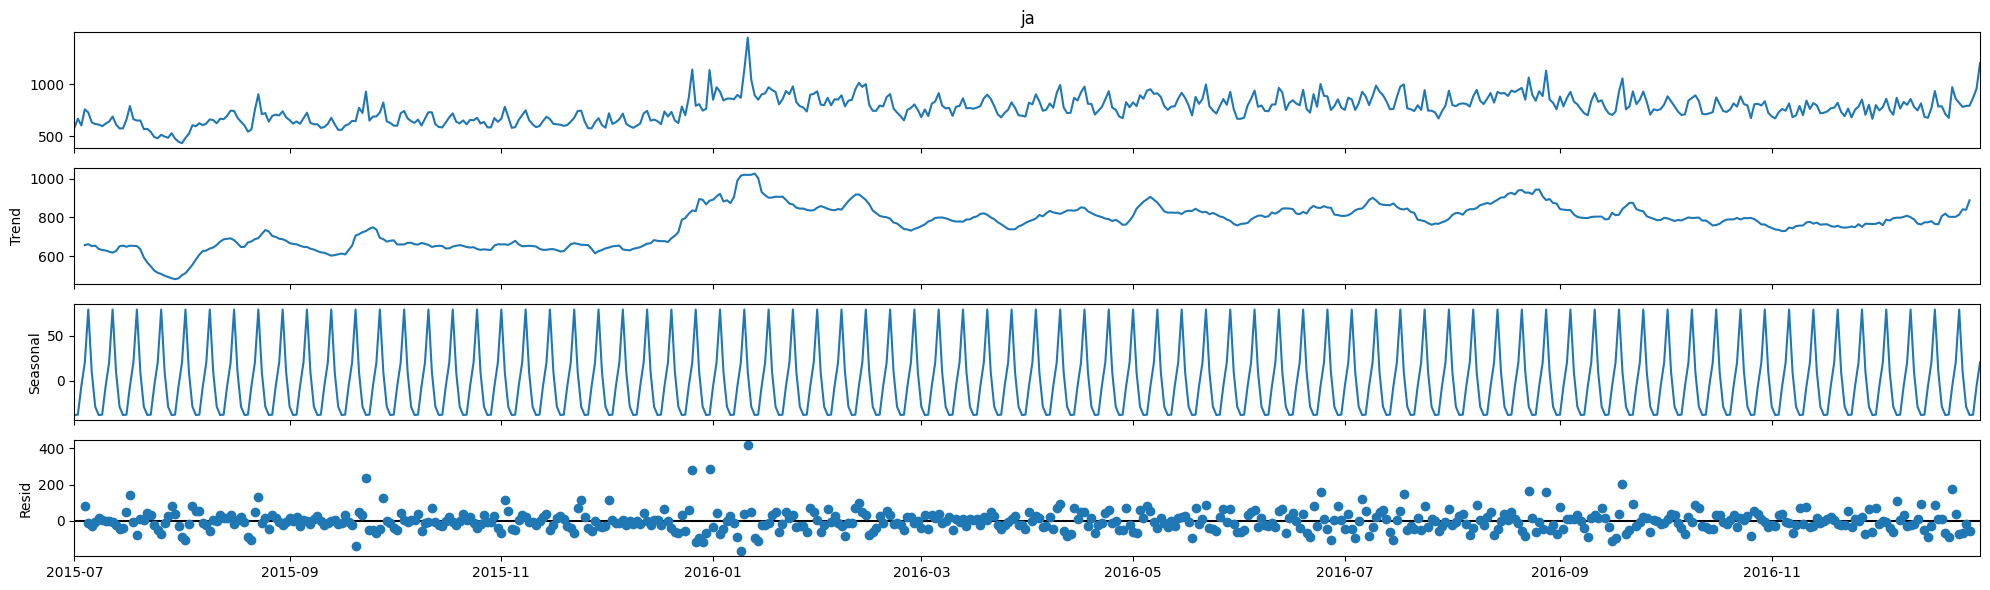

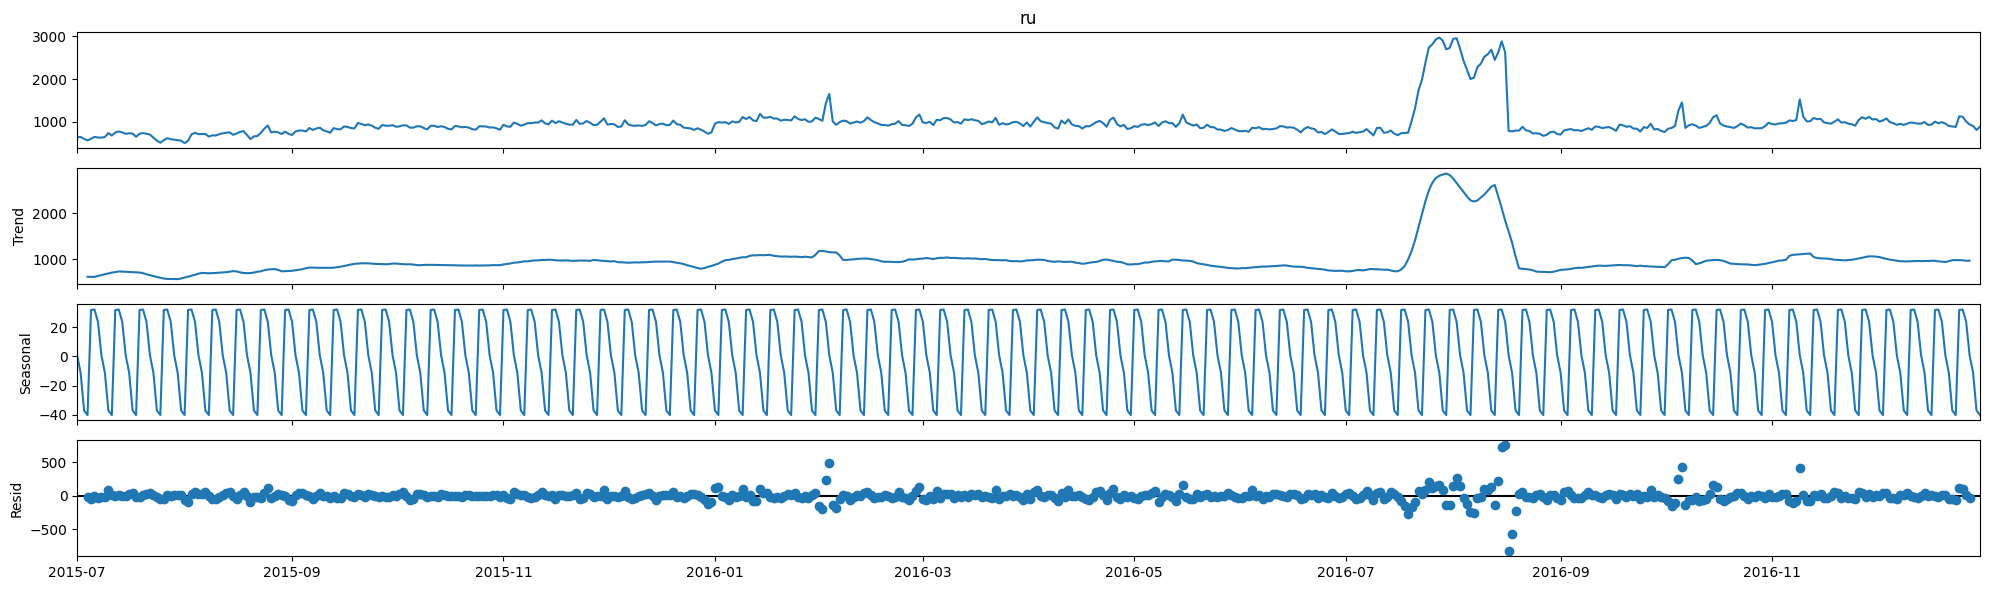

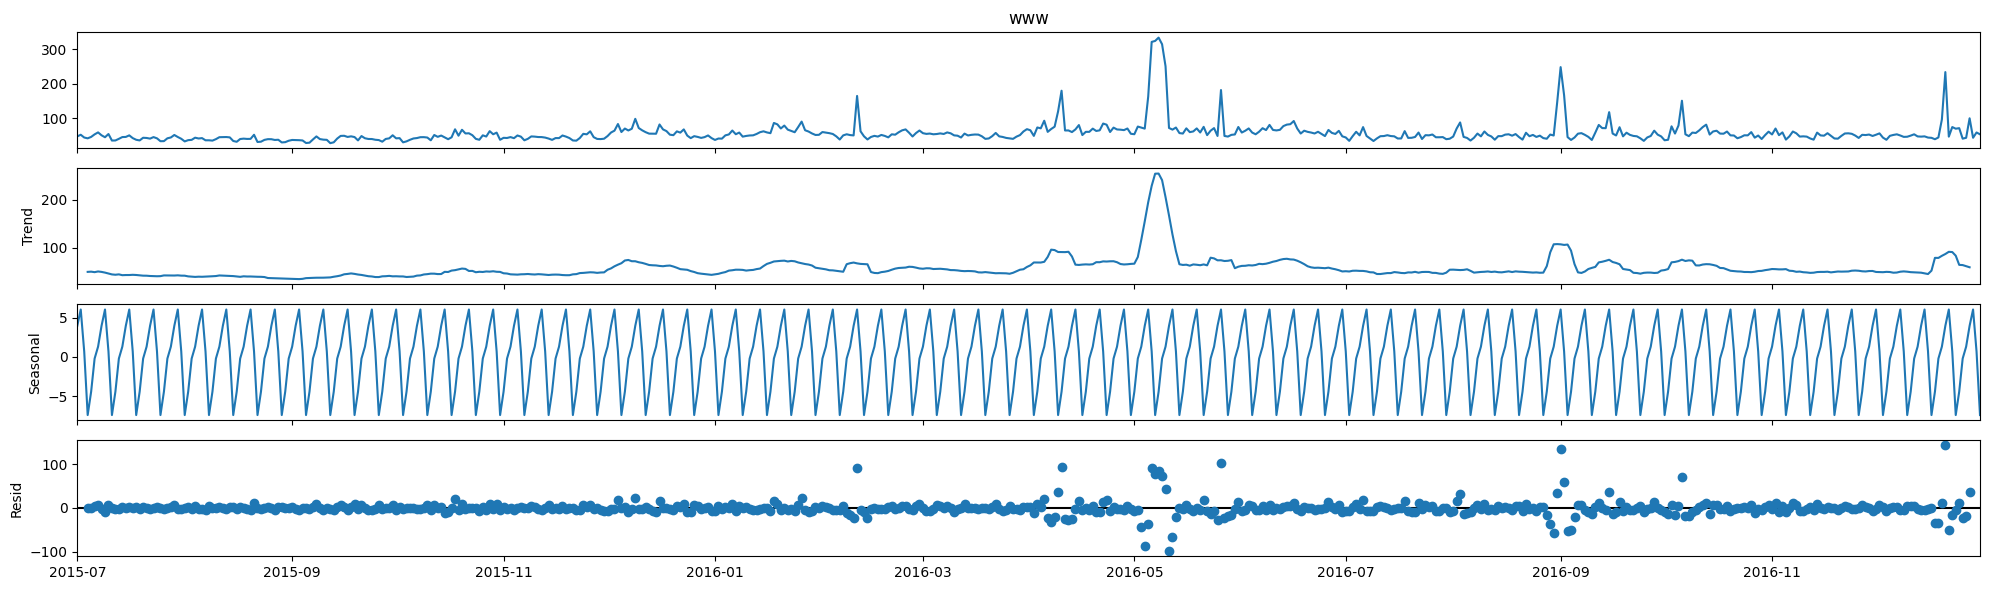

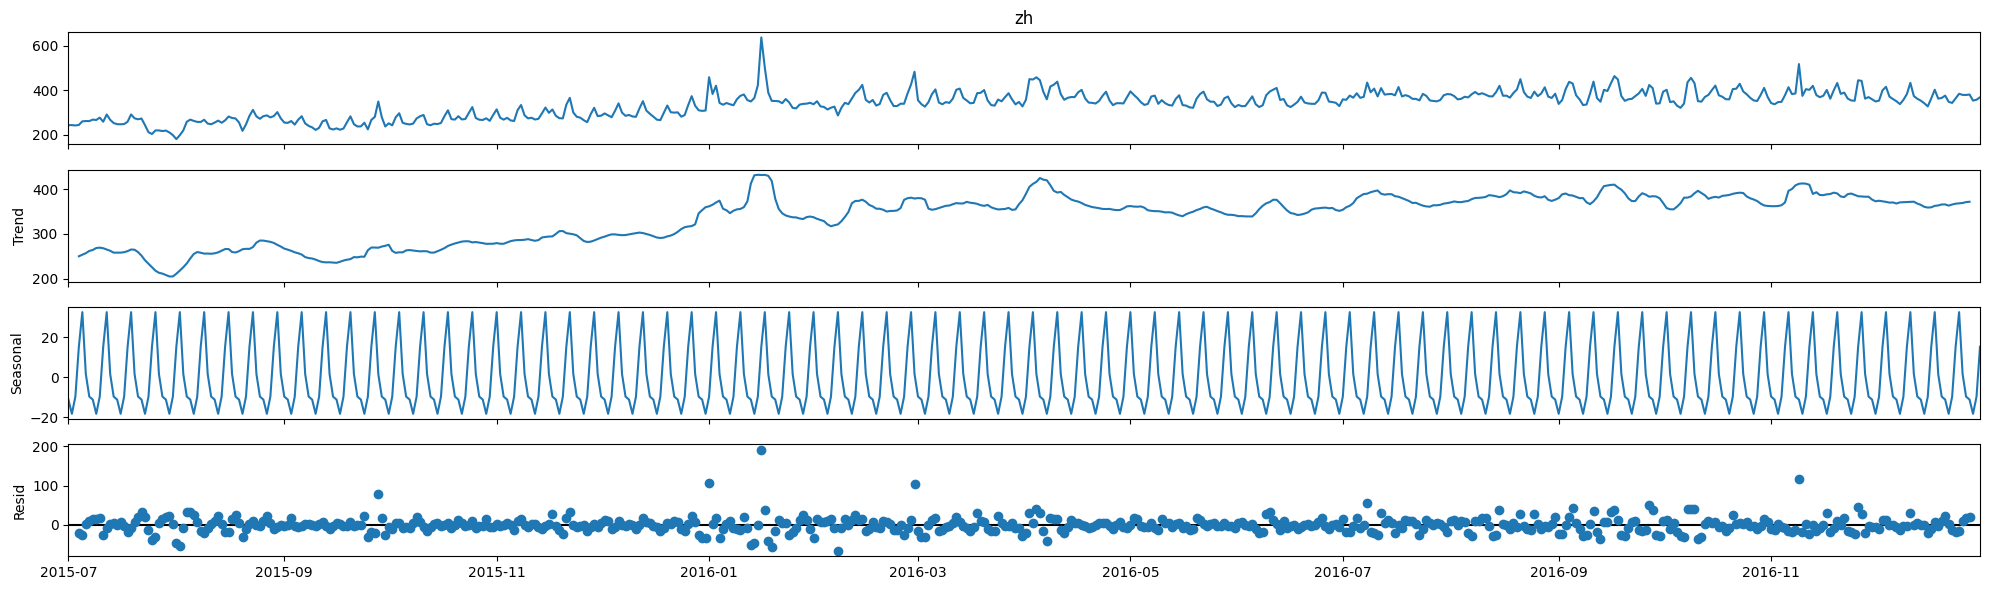

In [55]:
import statsmodels.api as sm
for i in Language_data.columns:
  model = sm.tsa.seasonal_decompose(Language_data[i], model = 'additive')
  model.plot()

* From decomposition we can see Trend, Seasonality and Residuals properly
* From the seasonal graph, we can see that there is weekly seasonality for all Lnaguages

**From Now on we will proceed for Analysis with one Language " en"**

## Detrending and DeSeasoning

### ACF Plot

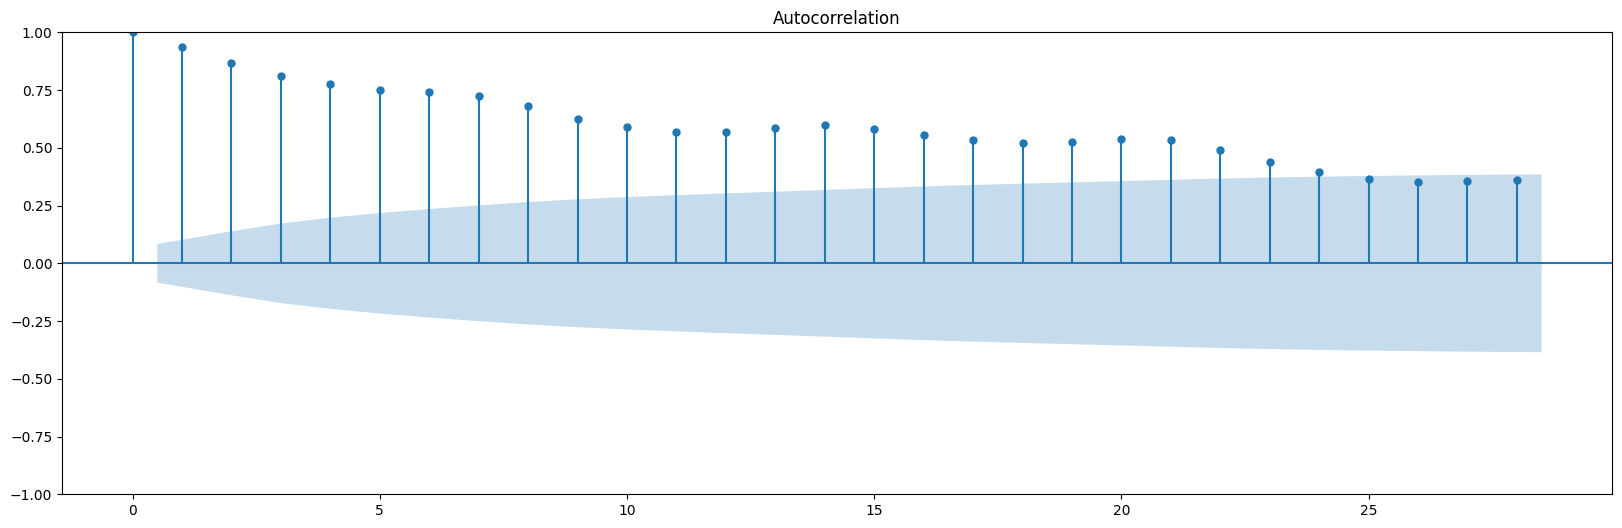

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Language_data.en)
plt.show()

* There is gradual decreas in the ACF values, which shows that there is trend in the Data
* we will detrend to make series stationary

### PACF plots

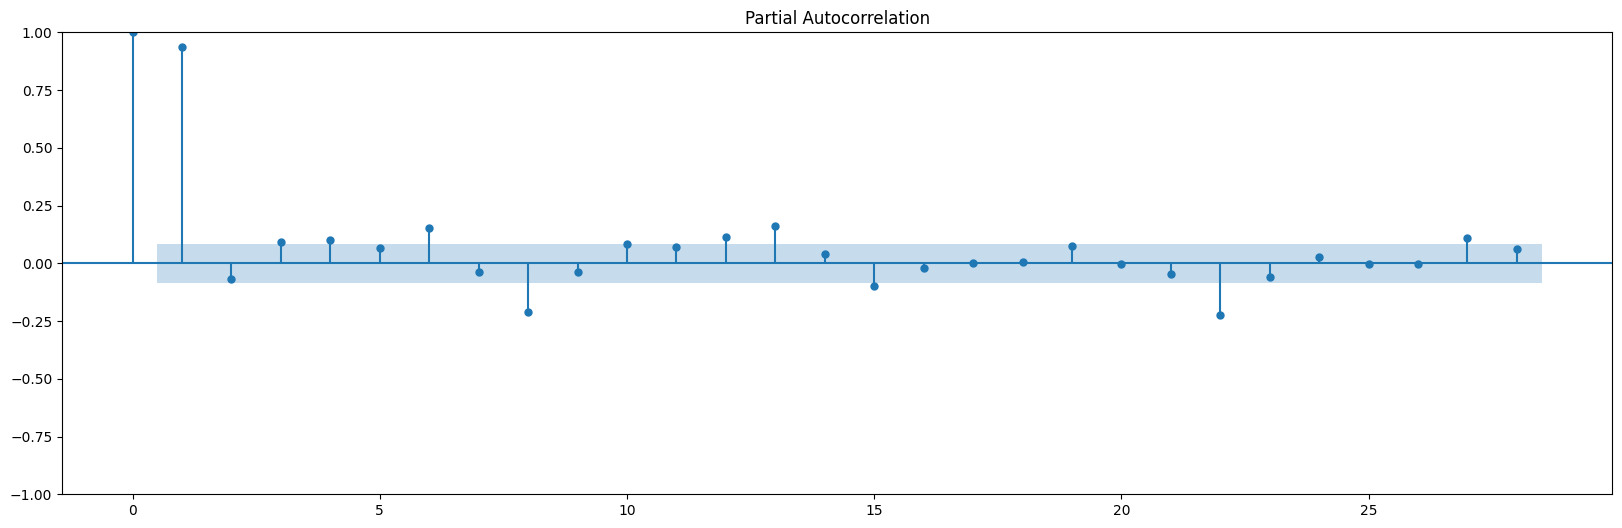

In [ ]:
plot_pacf(Language_data.en)
plt.show()

* there is Sharp cut off after lag = 1 , thereafter there is significant rise in the PACF value at every interval of 7

### Detrending & Deseasoning

In [ ]:
adf_test(Language_data.en, significance_level=0.05)

Sequence is not stationary


* Lets detrend the "en" Series by differencing
* step1: we will do difference , step2 : then check stationary test ....repeat 2 steps until data is Stationary

In [ ]:
Language_data["en_stationary"]= Language_data.en.diff(1)

<Axes: >

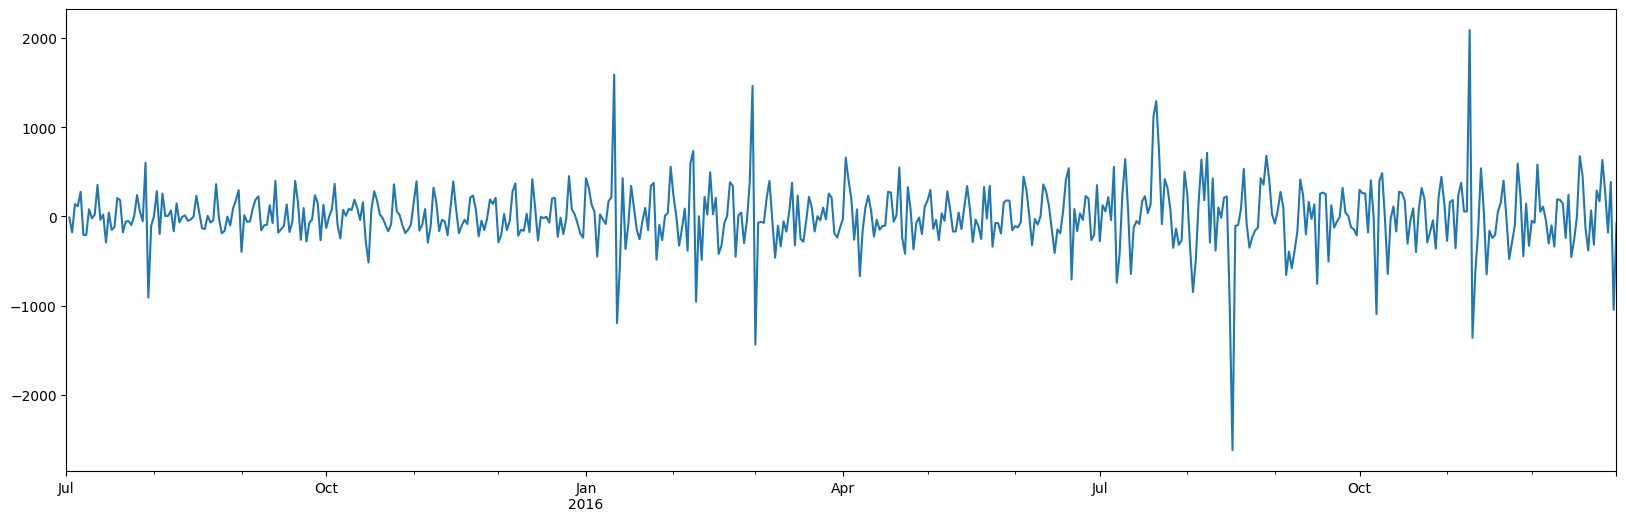

In [ ]:
Language_data["en_stationary"].plot()

In [ ]:
Language_data["en_stationary"].isna().sum()

1

In [ ]:
Language_data["en_stationary"] = Language_data["en_stationary"].fillna(0)

In [ ]:
adf_test(Language_data["en_stationary"], significance_level=0.05)

Sequence is stationary


* Now we can see that "en_detrend" Series is Stationary

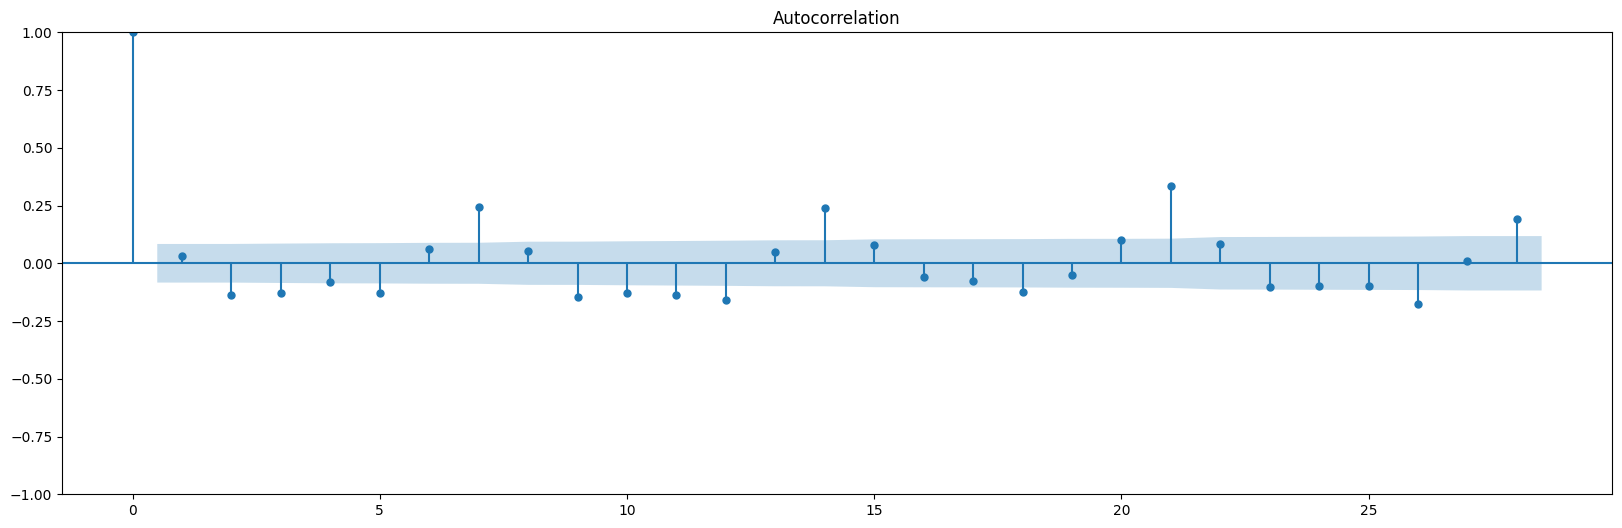

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Language_data["en_stationary"])
plt.show()

* we can See that there is Seasonality of 7 Days as seen earlier in Decompositiona and PACF Plot

## Train Test Data Splitting

In [ ]:
Language_data.head()

Language       commons          de           en           es          fr  \
2015-07-01  108.888136  719.195086  3528.204498  1088.138523  476.247846   
2015-07-02  112.449174  709.398850  3516.807372  1039.884125  479.305895   
2015-07-03  109.816455  680.878729  3338.930779   956.315932  460.899161   
2015-07-04   90.800515  624.817171  3476.185090   897.837618  492.643545   
2015-07-05  100.986542  726.344886  3590.113994   976.451535  483.671696   

Language            ja          ru        www          zh  en_stationary  
2015-07-01  583.244838  631.344496  48.229624  242.354441       0.000000  
2015-07-02  669.655457  642.271047  52.914081  242.717009     -11.397126  
2015-07-03  604.984415  595.294396  44.919873  241.107350    -177.876593  
2015-07-04  759.893756  559.920881  42.581161  243.433784     137.254311  
2015-07-05  728.967748  596.299400  46.681147  259.678770     113.928905

* As observed earlier, there is a weekly seasonality, so we take 8 weeks data for testing

In [ ]:
train = Language_data.loc[Language_data.index < Language_data.index[-56]][["en"]].copy()
test = Language_data.loc[Language_data.index >= Language_data.index[-56]][["en"]].copy()

train.tail(5)

Language             en
2016-11-01  4753.236401
2016-11-02  4913.487422
2016-11-03  5097.526447
2016-11-04  4741.684965
2016-11-05  4986.666014

In [ ]:
test.head(5)

Language             en
2016-11-06  5363.628322
2016-11-07  5418.339442
2016-11-08  5473.774802
2016-11-09  7562.455727
2016-11-10  6202.818825

## Model Performance Function

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

## Triple Exponential Smoothening

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.ExponentialSmoothing(train['en'], trend="add", seasonal = "add").fit()

In [ ]:
test["pred"] = model.forecast(steps = 56)

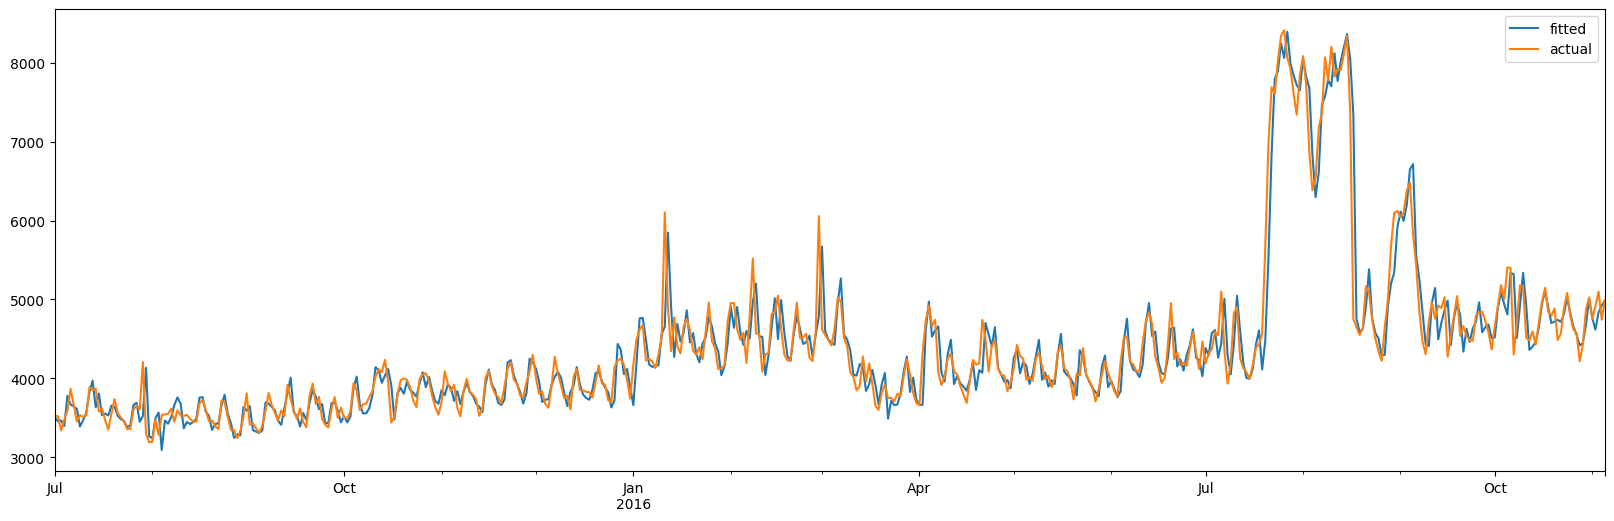

In [ ]:
model.fittedvalues.plot(label="fitted")
train.en.plot(label="actual")
plt.legend()
plt.show()

<Axes: >

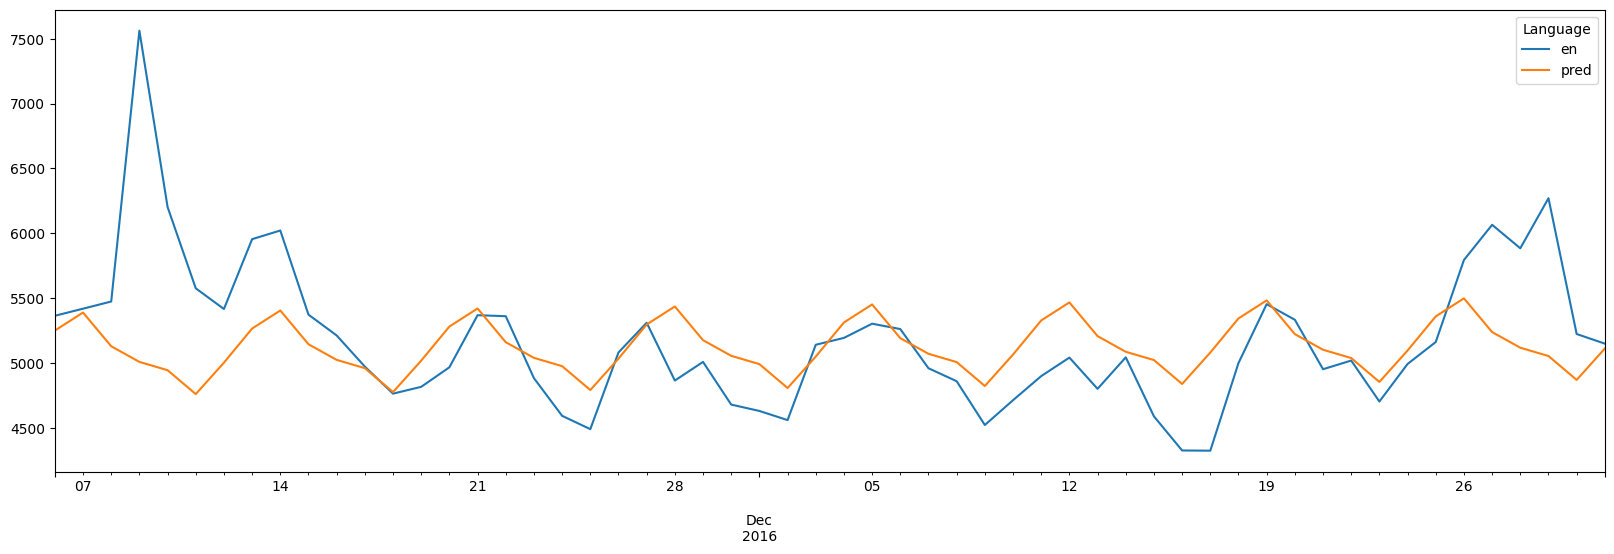

In [ ]:
test.plot()

In [ ]:
performance(test['en'], test['pred'])

MAE : 350.457
RMSE : 537.99
MAPE: 0.064


## ARIMA

From the above analysis we will fix our model parameters as below
* p = 7
* q = 7
* d = 1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


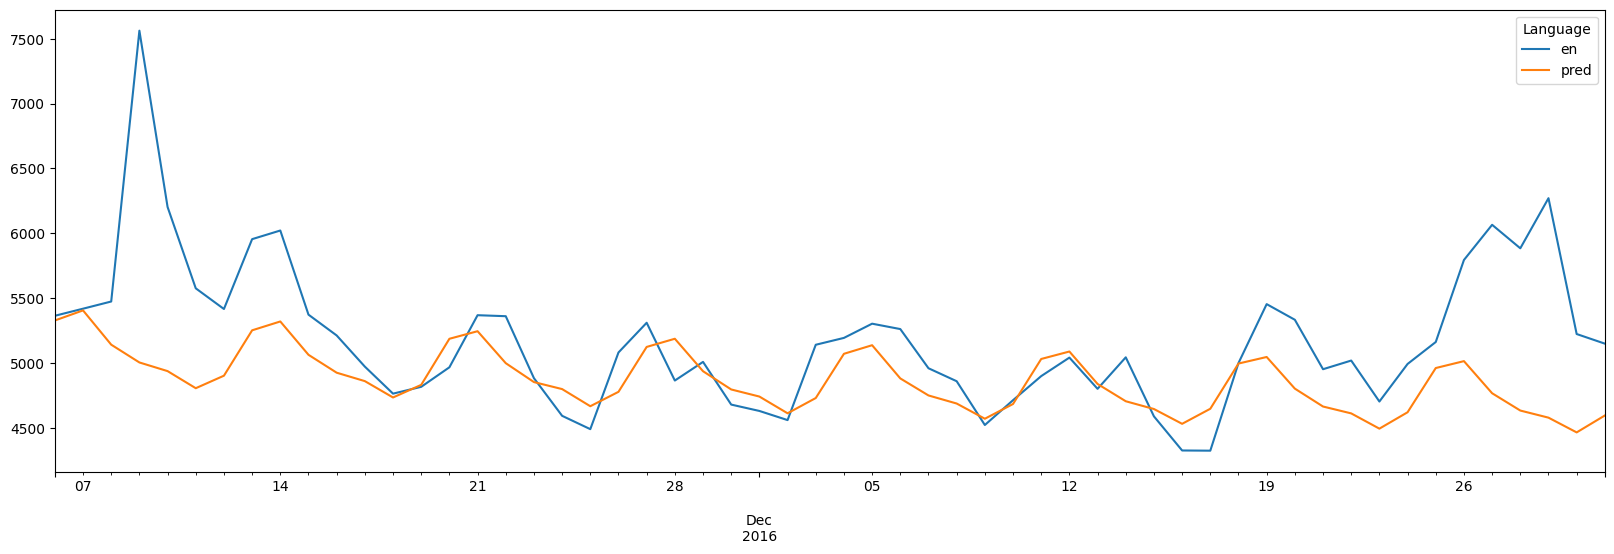

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order = (7, 1, 7))
model = model.fit(disp=False)

test['pred'] = model.forecast(steps=56)

test.plot();

In [ ]:
performance(test['en'], test['pred'])

MAE : 381.581
RMSE : 598.808
MAPE: 0.068


* lets do Grid Search to finetune p in AR and q in MA

In [ ]:
best_score = 1
mat = [0]*7
for p in np.arange(1,8):
  for q in np.arange(1,8):
    order = (p,1,q)
    model = SARIMAX(train, order = order)
    model = model.fit(disp=False)
    test['pred'] = model.forecast(steps=56)
    if (mape(test['en'], test['pred'])) < best_score :
      best_score, best_cfg = mape(test['en'], test['pred']), order

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

In [ ]:
print('Best ARIMA%s MAPE=%.3f' % (best_cfg, best_score))

Best ARIMA(3, 1, 3) MAPE=0.062


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


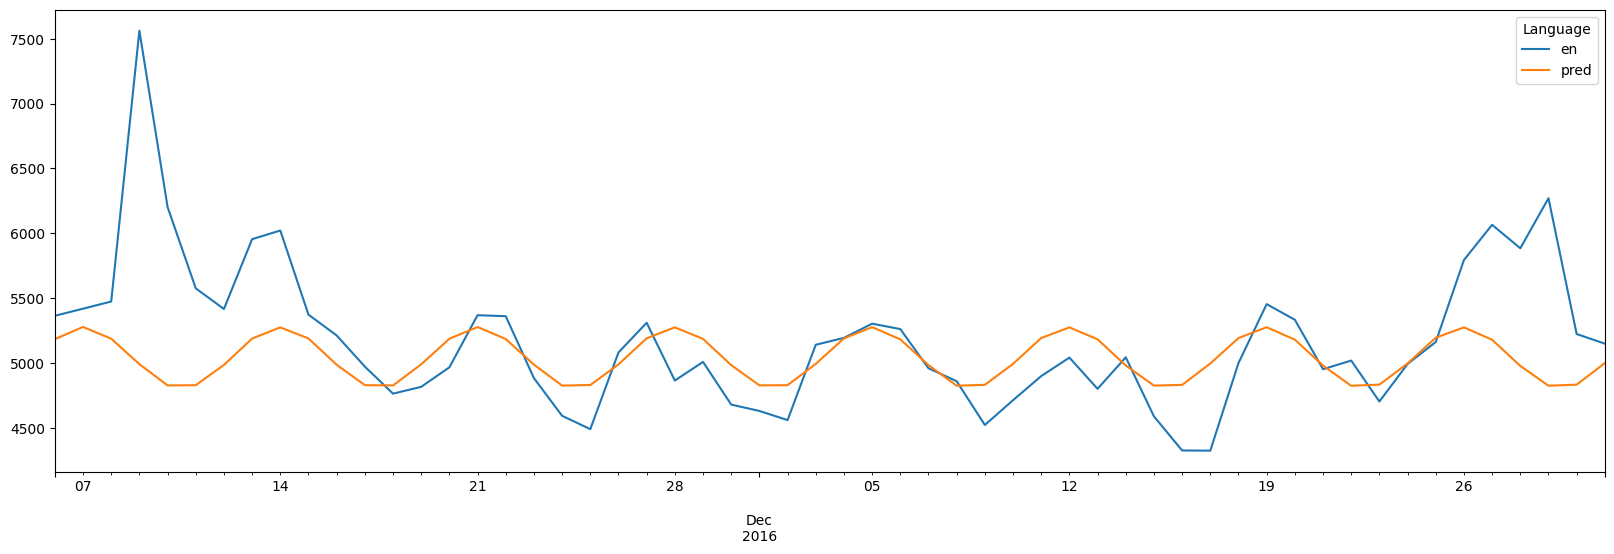

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order = (3, 1, 3))
model = model.fit(disp=False)

test['pred'] = model.forecast(steps=56)

test.plot();

In [ ]:
performance(test['en'], test['pred'])

MAE : 344.28
RMSE : 549.689
MAPE: 0.062


In [ ]:
mat = [[0]*7]*7
for p in np.arange(1,8):
  for q in np.arange(1,8):
    order = (p,1,q)
    model = SARIMAX(train, order = order)
    model = model.fit(disp=False)
    test['pred'] = model.forecast(steps=56)
    mat[p-1][q-1] = mape(test['en'], test['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

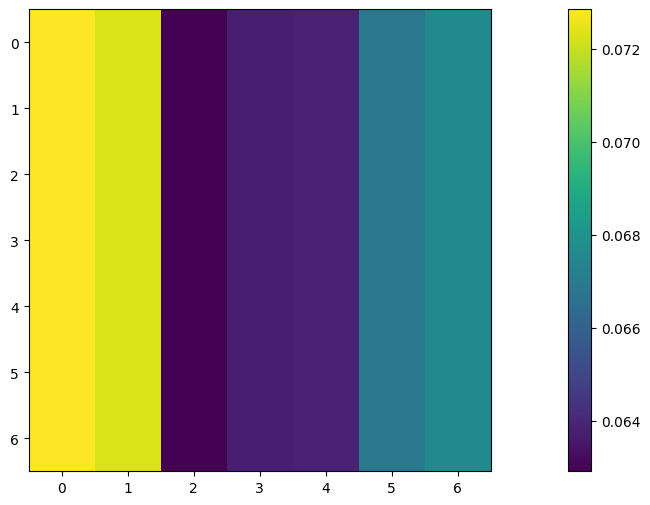

In [ ]:
plt.imshow(mat, cmap='viridis')
plt.colorbar()
plt.show()

## SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


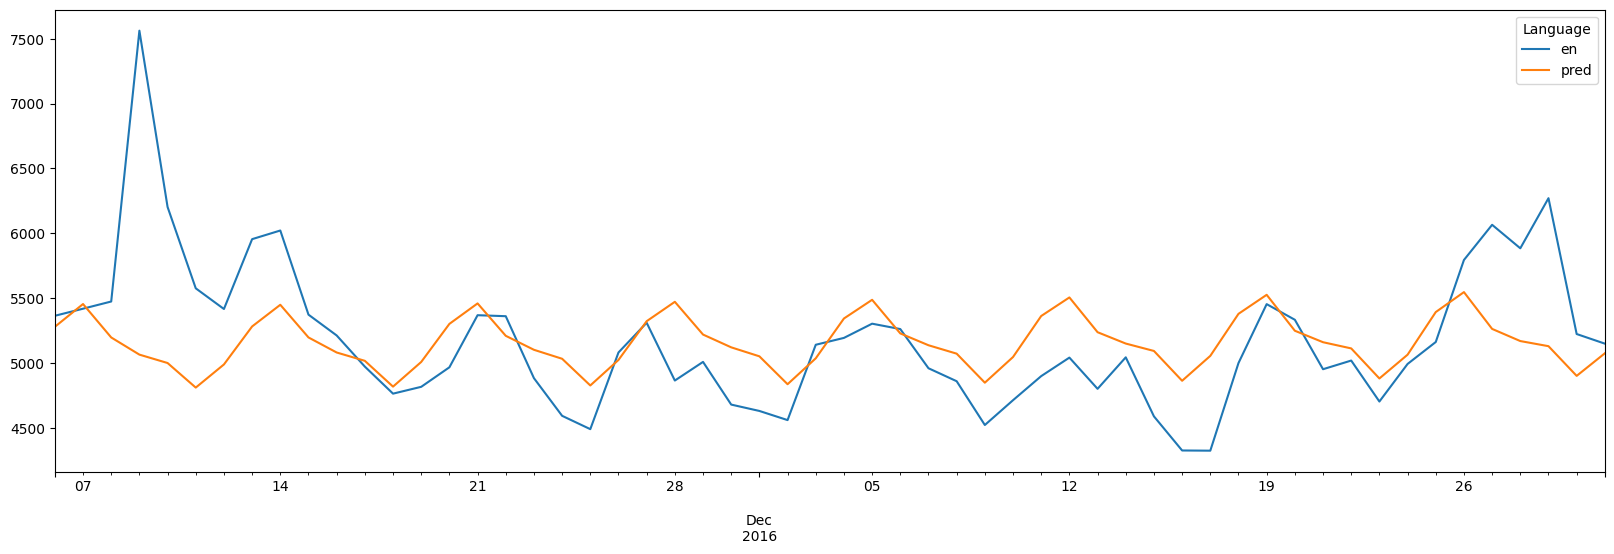

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order = (3, 1, 3),seasonal_order = (1, 1, 1, 7))
model = model.fit(disp=False)

test['pred'] = model.forecast(steps=56)

test.plot();

In [ ]:
performance(test['en'], test['pred'])

MAE : 359.368
RMSE : 530.844
MAPE: 0.067


## SARIMAX

### Exog Data load

In [ ]:
campaign = pd.read_csv("Exog_Campaign_eng")

In [ ]:
campaign.index = pd.date_range('2015-07-01', '2016-12-31', freq='D')

In [ ]:
campaign.head()

Exog
2015-07-01     0
2015-07-02     0
2015-07-03     0
2015-07-04     0
2015-07-05     0

In [ ]:
campaign.shape

(550, 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


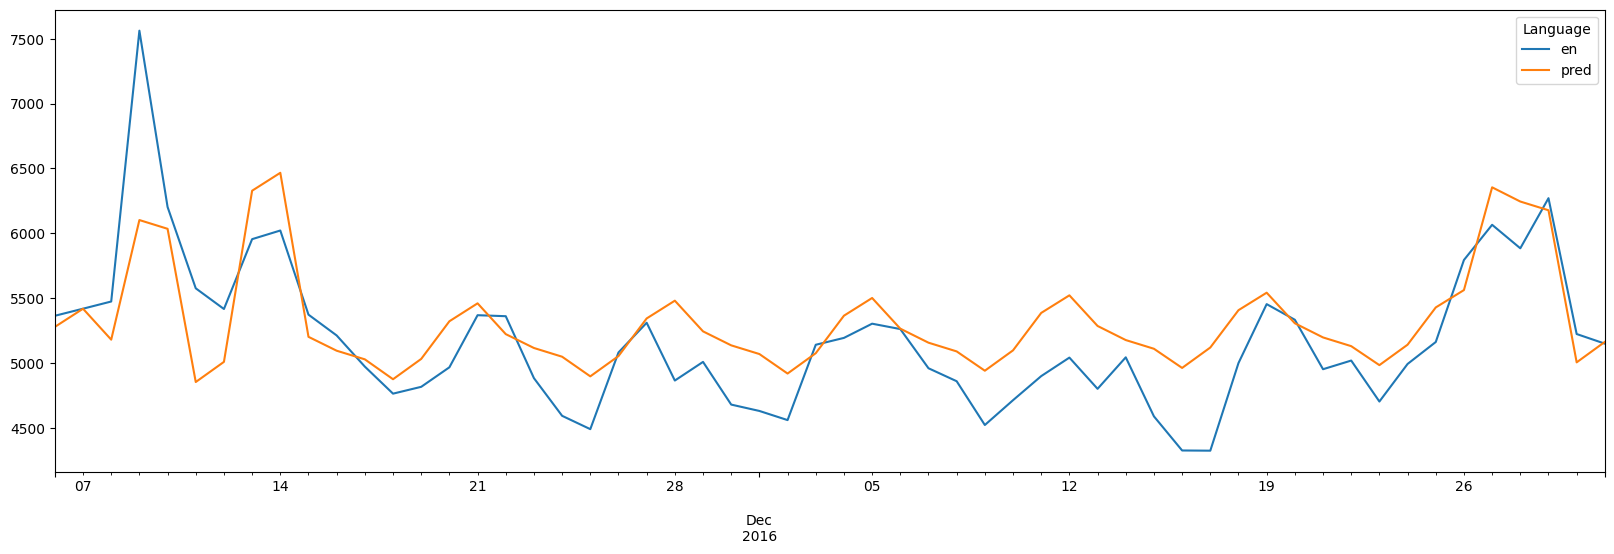

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order = (3, 1, 3),exog = campaign["Exog"][:-56],seasonal_order = (1, 0, 1, 7))
model = model.fit(disp=False)

test['pred'] = model.forecast(steps=56,exog = campaign["Exog"][-56:])

test.plot();

In [ ]:
performance(test['en'], test['pred'])

MAE : 294.025
RMSE : 382.567
MAPE: 0.057


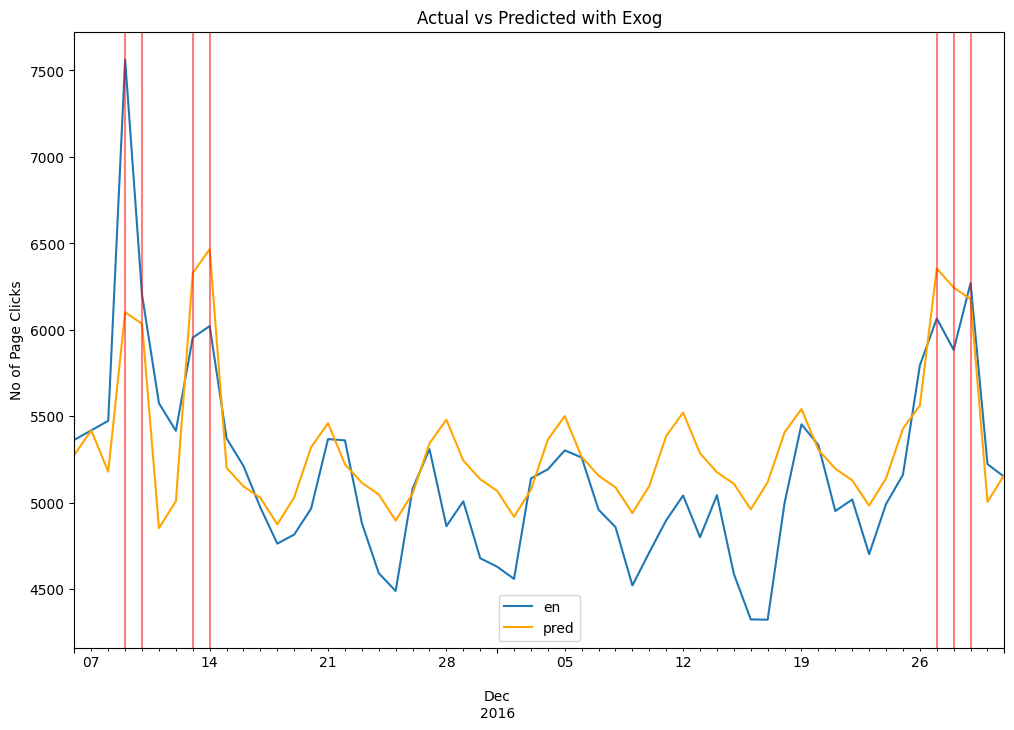

In [ ]:
# Plot predictions against known values
title='Actual vs Predicted with Exog'
ylabel='No of Page Clicks'
xlabel=''

ax = test['en'].plot(legend=True,figsize=(12,8),title=title)
test["pred"].plot(legend=True, color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in campaign[campaign["Exog"]==1][-56:].index:
    ax.axvline(x=x, color='red', alpha = 0.5)
plt.xlim(pd.to_datetime("2016-11-06"), pd.to_datetime('2016-12-31'))
plt.legend()


## Prophet

In [ ]:
!pip install pystan~=2.14

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61975158 sha256=581bc0ba0874cbe6c1164da086c78139bc67ba906281c9490ca175d6e29278a5
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan


In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
Language_data.head()

Language       commons          de           en           es          fr  \
2015-07-01  108.888136  719.195086  3528.204498  1088.138523  476.247846   
2015-07-02  112.449174  709.398850  3516.807372  1039.884125  479.305895   
2015-07-03  109.816455  680.878729  3338.930779   956.315932  460.899161   
2015-07-04   90.800515  624.817171  3476.185090   897.837618  492.643545   
2015-07-05  100.986542  726.344886  3590.113994   976.451535  483.671696   

Language            ja          ru        www          zh  en_stationary  
2015-07-01  583.244838  631.344496  48.229624  242.354441       0.000000  
2015-07-02  669.655457  642.271047  52.914081  242.717009     -11.397126  
2015-07-03  604.984415  595.294396  44.919873  241.107350    -177.876593  
2015-07-04  759.893756  559.920881  42.581161  243.433784     137.254311  
2015-07-05  728.967748  596.299400  46.681147  259.678770     113.928905

* Data Set Preparation as per fb Prophet Format
* df[['ds','y', 'extra1', 'extra2']]

In [ ]:
Language_data.en.reset_index(drop=True)

0      3528.204498
1      3516.807372
2      3338.930779
3      3476.185090
4      3590.113994
          ...     
545    6065.336568
546    5884.146855
547    6270.617826
548    5223.014786
549    5148.846689
Name: en, Length: 550, dtype: float64

In [ ]:
fbprodf = pd.DataFrame()

In [ ]:
fbprodf["ds"] = Language_data.index
fbprodf["y"] = Language_data.en.reset_index(drop=True)
fbprodf["campaign"] = campaign.Exog

In [ ]:
# Loading Exog values
campaign = pd.read_csv("Exog_Campaign_eng")

In [ ]:
fbprodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        550 non-null    datetime64[ns]
 1   y         550 non-null    float64       
 2   campaign  550 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 13.0 KB


In [ ]:
model2=Prophet(weekly_seasonality=True)
model2.add_regressor('campaign') #adding exog-> holidays data in the model2

model2.fit(fbprodf[:-56])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5b4r5dr8/70tqzwwg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5b4r5dr8/74xa13_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78822', 'data', 'file=/tmp/tmp5b4r5dr8/70tqzwwg.json', 'init=/tmp/tmp5b4r5dr8/74xa13_2.json', 'output', 'file=/tmp/tmp5b4r5dr8/prophet_modelea05un8y/prophet_model-20240311172347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:23:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:23:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


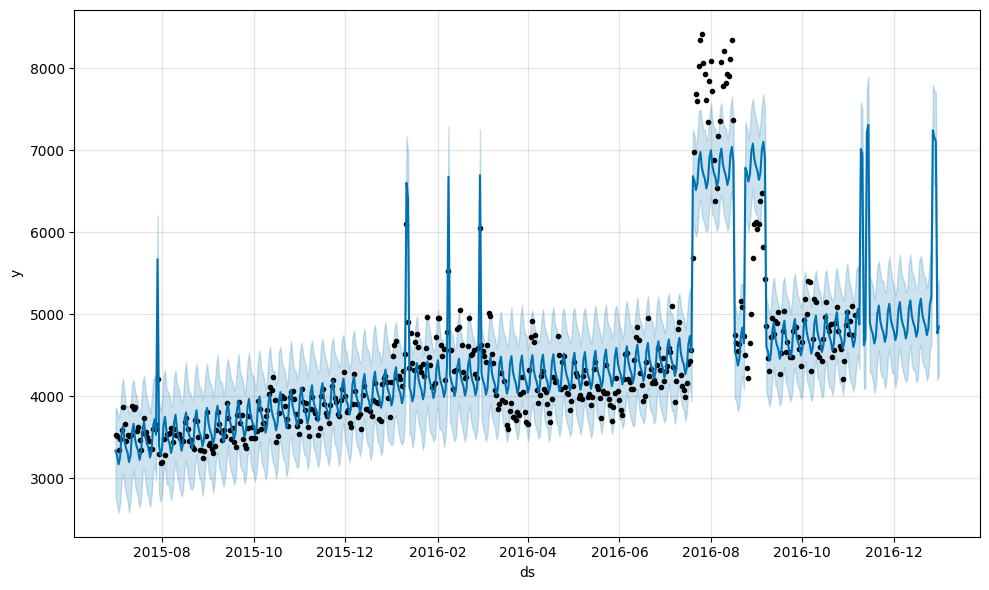

In [ ]:
forecast2 = model2.predict(fbprodf)
fig = model2.plot(forecast2)

In [ ]:
forecast2

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2015-07-01  3369.040250  2756.335532  3861.313088  3369.040250   
1   2015-07-02  3372.979349  2682.945111  3825.802810  3372.979349   
2   2015-07-03  3376.918448  2579.751171  3729.020155  3376.918448   
3   2015-07-04  3380.857547  2689.844823  3811.551513  3380.857547   
4   2015-07-05  3384.796646  2981.799548  4107.599254  3384.796646   
..         ...          ...          ...          ...          ...   
545 2016-12-27  4964.392854  6627.775085  7799.771060  4949.689182   
546 2016-12-28  4967.349388  6581.047474  7715.951322  4952.184554   
547 2016-12-29  4970.305922  6565.667381  7704.384964  4954.508689   
548 2016-12-30  4973.262456  4197.080253  5309.650090  4957.024362   
549 2016-12-31  4976.218990  4254.282655  5427.505248  4959.680783   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    3369.040250      -31.979431            -31.979431            -31.979431   
1    3372.979349      -90.602797            -90.602797            -90.602797   
2    3376.918448     -206.886195           -206.886195           -206.886195   
3    3380.857547     -128.622129           -128.622129           -128.622129   
4    3384.796646      155.134948            155.134948            155.134948   
..           ...             ...                   ...                   ...   
545  4981.137060     2277.490410           2277.490410           2277.490410   
546  4984.675046     2190.443934           2190.443934           2190.443934   
547  4988.073508     2131.820568           2131.820568           2131.820568   
548  4991.595894     -206.886195           -206.886195           -206.886195   
549  4994.859723     -128.622129           -128.622129           -128.622129   

        campaign  ...  extra_regressors_additive  \
0       0.000000  ...                   0.000000   
1       0.000000  ...                   0.000000   
2       0.000000  ...                   0.000000   
3       0.000000  ...                   0.000000   
4       0.000000  ...                   0.000000   
..           ...  ...                        ...   
545  2222.423365  ...                2222.423365   
546  2222.423365  ...                2222.423365   
547  2222.423365  ...                2222.423365   
548     0.000000  ...                   0.000000   
549     0.000000  ...                   0.000000   

     extra_regressors_additive_lower  extra_regressors_additive_upper  \
0                           0.000000                         0.000000   
1                           0.000000                         0.000000   
2                           0.000000                         0.000000   
3                           0.000000                         0.000000   
4                           0.000000                         0.000000   
..                               ...                              ...   
545                      2222.423365                      2222.423365   
546                      2222.423365                      2222.423365   
547                      2222.423365                      2222.423365   
548                         0.000000                         0.000000   
549                         0.000000                         0.000000   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0    -31.979431    -31.979431    -31.979431                   0.0   
1    -90.602797    -90.602797    -90.602797                   0.0   
2   -206.886195   -206.886195   -206.886195                   0.0   
3   -128.622129   -128.622129   -128.622129                   0.0   
4    155.134948    155.134948    155.134948                   0.0   
..          ...           ...           ...                   ...   
545   55.067045     55.067045     55.067045                   0.0   
546  -31.979431    -31.979431    -31.979431                   0.0   
547  -90.602797    -90.602797    -90.602797                   0.0   
548 -206.886195   

In [ ]:
performance(fbprodf['y'][-56:],forecast2['yhat'][-56:])

MAE : 350.593
RMSE : 477.452
MAPE: 0.064
